In [1]:
# Import necessary packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.preprocessing import OneHotEncoder
import plotly.graph_objs as go
import cufflinks as cf
import plotly.express as px

# For offline use
cf.go_offline()

In [2]:
df = pd.read_csv("BankChurners.csv")
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

# Data Cleaning and prepocessing

In [3]:
df.shape

(10127, 23)

In [4]:
dp='Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
dp2='Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'
dp1='CLIENTNUM'
df.drop([dp, dp1,dp2], axis=1, inplace=True)

In [5]:
# Creating DataFrame with Dtype, Unique, and Null information
df_info = pd.DataFrame(df.dtypes, columns=['Dtype'])
df_info['Unique'] = df.nunique().values
df_info['Null'] = df.isnull().sum().values
df_info

Dtype  Unique  Null
Attrition_Flag             object       2     0
Customer_Age                int64      45     0
Gender                     object       2     0
Dependent_count             int64       6     0
Education_Level            object       7     0
Marital_Status             object       4     0
Income_Category            object       6     0
Card_Category              object       4     0
Months_on_book              int64      44     0
Total_Relationship_Count    int64       6     0
Months_Inactive_12_mon      int64       7     0
Contacts_Count_12_mon       int64       7     0
Credit_Limit              float64    6205     0
Total_Revolving_Bal         int64    1974     0
Avg_Open_To_Buy           float64    6813     0
Total_Amt_Chng_Q4_Q1      float64    1158     0
Total_Trans_Amt             int64    5033     0
Total_Trans_Ct              int64     126     0
Total_Ct_Chng_Q4_Q1       float64     830     0
Avg_Utilization_Ratio     float64     964     0

In [6]:
# checking for duplicated values
df.duplicated().sum()

0

In [7]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [8]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [9]:
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [10]:
#df['Education_Level'] = df['Education_Level'].replace(['Unknown'], 'Graduate')
df = df[df['Education_Level'] != 'Unknown']

In [11]:
df['Marital_Status'].value_counts()

Married     3999
Single      3322
Divorced     652
Unknown      635
Name: Marital_Status, dtype: int64

In [12]:
df = df[df['Marital_Status'] != 'Unknown']

In [13]:
df['Income_Category'].value_counts()

Less than $40K    2792
$40K - $60K       1412
$80K - $120K      1202
$60K - $80K       1103
Unknown            892
$120K +            572
Name: Income_Category, dtype: int64

In [14]:
#df['Income_Category'] = df['Income_Category'].replace(['Unknown'], 'Less than $40K')
df = df[df['Income_Category'] != 'Unknown']

In [15]:
df['Income_Category'].value_counts()

Less than $40K    2792
$40K - $60K       1412
$80K - $120K      1202
$60K - $80K       1103
$120K +            572
Name: Income_Category, dtype: int64

In [16]:
df['Card_Category'].value_counts()

Blue        6598
Silver       391
Gold          81
Platinum      11
Name: Card_Category, dtype: int64

In [17]:
# Creating DataFrame with Dtype, Unique, and Null information
df_info = pd.DataFrame(df.dtypes, columns=['Dtype'])
df_info['Unique'] = df.nunique().values
df_info['Null'] = df.isnull().sum().values
df_info

Dtype  Unique  Null
Attrition_Flag             object       2     0
Customer_Age                int64      45     0
Gender                     object       2     0
Dependent_count             int64       6     0
Education_Level            object       6     0
Marital_Status             object       3     0
Income_Category            object       5     0
Card_Category              object       4     0
Months_on_book              int64      44     0
Total_Relationship_Count    int64       6     0
Months_Inactive_12_mon      int64       7     0
Contacts_Count_12_mon       int64       7     0
Credit_Limit              float64    4654     0
Total_Revolving_Bal         int64    1821     0
Avg_Open_To_Buy           float64    5144     0
Total_Amt_Chng_Q4_Q1      float64    1067     0
Total_Trans_Amt             int64    4194     0
Total_Trans_Ct              int64     124     0
Total_Ct_Chng_Q4_Q1       float64     771     0
Avg_Utilization_Ratio     float64     946     0

In [18]:
df.head(10)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0   Existing Customer            45      M                3     High School   
1   Existing Customer            49      F                5        Graduate   
2   Existing Customer            51      M                3        Graduate   
4   Existing Customer            40      M                3      Uneducated   
5   Existing Customer            44      M                2        Graduate   
8   Existing Customer            37      M                3      Uneducated   
9   Existing Customer            48      M                2        Graduate   
12  Existing Customer            56      M                1         College   
14  Existing Customer            57      F                2        Graduate   
16  Existing Customer            48      M                4   Post-Graduate   

   Marital_Status Income_Category Card_Category  Months_on_book  \
0         Married     $60K - $80K          Blue              39   
1          Single  Less than $40K          Blue              44   
2         Married    $80K - $120K          Blue              36   
4         Married     $60K - $80K          Blue              21   
5         Married     $40K - $60K          Blue              36   
8          Single     $60K - $80K          Blue              36   
9          Single    $80K - $120K          Blue              36   
12         Single    $80K - $120K          Blue              36   
14        Married  Less than $40K          Blue              48   
16         Single    $80K - $120K          Blue              36   

    Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                          5                       1                      3   
1                          6                       1                      2   
2                          4                       1                      0   
4                          5                       1                      0   
5                          3                       1                      2   
8                          5                       2                      0   
9                          6                       3                      3   
12                         3                       6                      0   
14                         5                       2                      2   
16                         6                       2                      3   

    Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0        12691.0                  777          11914.0                 1.335   
1         8256.0                  864           7392.0                 1.541   
2         3418.0                    0           3418.0                 2.594   
4         4716.0                    0           4716.0                 2.175   
5         4010.0                 1247           2763.0                 1.376   
8        22352.0                 2517          19835.0                 3.355   
9        11656.0                 1677           9979.0                 1.524   
12       11751.0                    0          11751.0                 3.397   
14        2436.0                  680           1756.0                 1.190   
16       30367.0                 2362          28005.0                 1.708   

    Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0              1144              42                1.625   
1              1291              33                3.714   
2              1887              20                2.333   
4               816              28                2.500   
5              1088              24                0.846   
8              1350              24                1.182   
9              1441              32                0.882   
12             1539              17                3.250   
14             1570              29                0.611   
16             1671              27             

# Visualization

<strong>Attrition_Flag</strong>
<br>(Existing Customer) -it means the customer is still an active customer .</br>
<br>(Attrited Customer) -it means that the customer has closed their account .</br>

In [19]:
# Explore Attrition_Flag value counts
counts_Acc_stat=df['Attrition_Flag'].value_counts()
fig = px.pie(values=df['Attrition_Flag'].value_counts(), names=counts_Acc_stat.index,title="customer activity")
fig.show()

In [20]:
# Craeting a dataframe  with the gender and attrition flag to find ratio and percentage of churn by M/F
Attrition_by_Gender = df.groupby(['Gender','Attrition_Flag']).size()
Attrition_by_Gender = Attrition_by_Gender.reset_index(name="Count")

# Calculate percentages all 
Attrition_by_Gender['Percentage'] = Attrition_by_Gender['Count'] / Attrition_by_Gender['Count'].sum() * 100

# Calculate percentages for each gender 
total_counts = Attrition_by_Gender.groupby('Gender')['Count'].transform('sum')
Attrition_by_Gender['Percentage_Gender'] = (Attrition_by_Gender['Count'] / total_counts) * 100
Attrition_by_Gender

Gender     Attrition_Flag  Count  Percentage  Percentage_Gender
0      F  Attrited Customer    576    8.134444          17.066667
1      F  Existing Customer   2799   39.528315          82.933333
2      M  Attrited Customer    537    7.583675          14.490016
3      M  Existing Customer   3169   44.753566          85.509984

In [21]:
fig = px.bar(Attrition_by_Gender, x='Attrition_Flag', y='Count', color='Attrition_Flag', facet_col='Gender',
            category_orders={'Attrition_Flag': ['Existing Customer', 'Attrited Customer']})

fig.update_layout(title_text='Attrition by Gender',
                  xaxis_title='Attrition Flag',
                  yaxis_title='Count')


annotation_text = " <br><br><br><br>Female Attrition Rate: 17.2%<br>"
annotation_text += "Male Attrition Rate: 14.4%<br><br>"
annotation_text += "Overall 1% difference"

fig.add_annotation(text=annotation_text,
                   xref="paper", yref="paper",
                   x=1.0, y=0.8,
                   showarrow=False,
                   font=dict(size=10))

fig.show()

In [22]:
fig = px.sunburst(Attrition_by_Gender, path=['Gender', 'Attrition_Flag'], values='Percentage',
                  hover_data=['Attrition_Flag'])
fig.show()

# Percentage of Attrition by Income Gender
<pr>the analysis indicates a slightly higher attrition rate among women compared to men, with a marginal difference of 1%.</pr>

<pr>We can see in the above graph that 52% of the customers are women Compared to men 47% ,with difference of 6%</pr>

<pr>Slightly more female clients than men, overall almost similar churning possibility</pr>

In [23]:


Attrition_by_Income = df.groupby(['Income_Category','Attrition_Flag']).size()
Attrition_by_Income = Attrition_by_Income.reset_index(name="Count")

# Calculate percentages all 
Attrition_by_Income['Percentage'] = Attrition_by_Income['Count'] / Attrition_by_Income['Count'].sum() * 100

# Calculate percentages for each Income_Category 
total_counts = Attrition_by_Income.groupby('Income_Category')['Count'].transform('sum')
Attrition_by_Income['Percentage_Income'] = (Attrition_by_Income['Count'] / total_counts) * 100

Attrition_by_Income


Income_Category     Attrition_Flag  Count  Percentage  Percentage_Income
0         $120K +  Attrited Customer    102    1.440475          17.832168
1         $120K +  Existing Customer    470    6.637481          82.167832
2     $40K - $60K  Attrited Customer    204    2.880949          14.447592
3     $40K - $60K  Existing Customer   1208   17.059737          85.552408
4     $60K - $80K  Attrited Customer    145    2.047733          13.145966
5     $60K - $80K  Existing Customer    958   13.529163          86.854034
6    $80K - $120K  Attrited Customer    189    2.669115          15.723794
7    $80K - $120K  Existing Customer   1013   14.305889          84.276206
8  Less than $40K  Attrited Customer    473    6.679847          16.941261
9  Less than $40K  Existing Customer   2319   32.749612          83.058739

In [24]:
# Attrition Bar Graph By Income Category



fig = px.bar(Attrition_by_Income, x='Attrition_Flag', y='Count',color='Attrition_Flag',
             facet_col='Income_Category',
            category_orders={'Attrition_Flag': ['Existing Customer', 'Attrited Customer']},
           )



fig.update_layout(title_text='Attrition by Income_Category',
                  xaxis_title='Attrition',
                  yaxis_title='Count',
                  width=1100,  # Set the width of the plot
                  height=500 ) # Set the height of the plot)




annotation_text = "Less Than 40K Attrition Rate: 17.2%<br>"

fig.add_annotation(text=annotation_text,
                   xref="paper", yref="paper",
                   x=1.2, y=0.5,
                   showarrow=False,
                   font=dict(size=12))

annotation_text2="We can see that people who have less than $40k%<br>"
annotation_text2+="income have the highest percentage of credit card usage."


fig.add_annotation(text=annotation_text2,
                   xref="paper", yref="paper",
                   x=0.3, y=0.89,
                   showarrow=False,
                   font=dict(size=13))

facet_col_labels = ['$120K +', '$40K - 60K', '$60K - 80K', '$80K - 120K']

# Set facet subplot labels
for i, label in enumerate(facet_col_labels):
    fig['layout']['annotations'][i]['text'] = label

fig.show()



# Percentage of Attrition by Income Category
| 120K +   |     40K - 60K  | 60K - 80K      |  80K - 120K | Less than $40K
| :---     |    :----:      |    :---:       |    :---:     |   ----:
|     17.6     |       15.1%     |    13.4%       |   15.5%      |  17.1%
|     1.2%     |       2.7%     |    1.9%       |   2.3%      |  8.0%

<br>The income bracket with the least rate of attition is 60K-80K</br> 
<br> We saw that customers that had a transactions lower than 40, had a higher probability of leaving the organization.</br>
<br>We can see that people who have less than $40k income have the highest percentage of credit card usage.<br>

In [25]:
df_age=df['Customer_Age']

# Create the box plot
box_plot = df_age.T.iplot(kind='box', 
                          title='Distribution_of_Customer_Ages', 
                          yTitle='age', 
                          asFigure=True)

# Show the plot
box_plot.show()

In [26]:
# Group by both 'Customer_Age' and 'Attrition_Flag' columns and count occurrences
Attrition_by_Customer_Age = df.groupby(['Customer_Age', 'Attrition_Flag']).size().reset_index(name='Count')

Attrition_by_Customer_Age['Percentage'] = Attrition_by_Customer_Age['Count'] / Attrition_by_Customer_Age['Count'].sum() * 100

# Calculate percentages for each Income_Category 
total_counts = Attrition_by_Customer_Age.groupby('Customer_Age')['Count'].transform('sum')
Attrition_by_Customer_Age['Percentage_Customer_Age'] = (Attrition_by_Customer_Age['Count'] / total_counts) * 100


Attrition_by_Customer_Age

Customer_Age     Attrition_Flag  Count  Percentage  \
0             26  Attrited Customer      5    0.070611   
1             26  Existing Customer     43    0.607259   
2             27  Attrited Customer      2    0.028245   
3             27  Existing Customer     19    0.268324   
4             28  Attrited Customer      1    0.014122   
..           ...                ...    ...         ...   
80            66  Existing Customer      1    0.014122   
81            67  Existing Customer      3    0.042367   
82            68  Attrited Customer      1    0.014122   
83            70  Existing Customer      1    0.014122   
84            73  Existing Customer      1    0.014122   

    Percentage_Customer_Age  
0                 10.416667  
1                 89.583333  
2                  9.523810  
3                 90.476190  
4                  6.666667  
..                      ...  
80               100.000000  
81               100.000000  
82               100.000000  
83               100.000000  
84               100.000000  

[85 rows x 5 columns]

In [27]:
custom_color_scale = ['red','blue']
# Create a line plot
fig = px.line(Attrition_by_Customer_Age, x='Customer_Age', y='Count', color='Attrition_Flag',
              title='Period of relationship with bank by Attrition_Flag',
              labels={'Customer_Age': 'Customer_Age', 'Count':'Count',
                      'Attrition_Flag': 'Attrition Flag'},color_discrete_sequence=custom_color_scale)
fig.update_traces(mode='lines+markers')

# Show the plot
fig.show()


In [28]:
# Create the area plot using Plotly Express
fig = px.area(Attrition_by_Customer_Age, 
              x='Customer_Age', 
              y='Count', 
              color='Attrition_Flag',
              title='Attrition by Customer Age',
              labels={'Count': 'Count', 'Customer_Age': 'Customer Age'},
              category_orders={'Attrition_Flag': ['Existing', 'Attrited']},
              width=900, height=500)
fig.show()

# Attrition Percentage By Customer_Age - Attrition_Flag
<Strong>Most users are in their 40's and 50'</Strong>

<pr>We can see from the above graph that Customer Age does not affect the number of customers using credit cards.</pr>


In [29]:
gender_counts_by_category = df.groupby(['Card_Category','Gender','Attrition_Flag']).size()
gender_counts_by_category = gender_counts_by_category.reset_index(name='Count')

gender_counts_by_category['Percentage'] = gender_counts_by_category['Count'] / gender_counts_by_category['Count'].sum() * 100

# Calculate percentages for each Card_Category 
total_counts = gender_counts_by_category.groupby(['Gender', 'Card_Category'])['Count'].transform('sum')
gender_counts_by_category['total_counts_c_G'] = gender_counts_by_category.groupby(['Gender', 'Card_Category'])['Count'].transform('sum')
gender_counts_by_category['Percentage_Card_Category_G'] = (gender_counts_by_category['Count'] / total_counts) * 100
gender_counts_by_category

Card_Category Gender     Attrition_Flag  Count  Percentage  \
0           Blue      F  Attrited Customer    553    7.809631   
1           Blue      F  Existing Customer   2673   37.748906   
2           Blue      M  Attrited Customer    481    6.792826   
3           Blue      M  Existing Customer   2891   40.827567   
4           Gold      F  Attrited Customer      6    0.084734   
5           Gold      F  Existing Customer     17    0.240079   
6           Gold      M  Attrited Customer      7    0.098856   
7           Gold      M  Existing Customer     51    0.720237   
8       Platinum      F  Attrited Customer      2    0.028245   
9       Platinum      F  Existing Customer      1    0.014122   
10      Platinum      M  Attrited Customer      1    0.014122   
11      Platinum      M  Existing Customer      7    0.098856   
12        Silver      F  Attrited Customer     15    0.211834   
13        Silver      F  Existing Customer    108    1.525208   
14        Silver      M  Attrited Customer     48    0.677870   
15        Silver      M  Existing Customer    220    3.106906   

    total_counts_c_G  Percentage_Card_Category_G  
0               3226                   17.141971  
1               3226                   82.858029  
2               3372                   14.264531  
3               3372                   85.735469  
4                 23                   26.086957  
5                 23                   73.913043  
6                 58                   12.068966  
7                 58                   87.931034  
8                  3                   66.666667  
9                  3                   33.333333  
10                 8                   12.500000  
11                 8                   87.500000  
12               123                   12.195122  
13               123                   87.804878  
14               268                   17.910448  
15               268                   82.089552

In [30]:
fig = px.bar(gender_counts_by_category, x='Gender', y='Count', color='Attrition_Flag', facet_col='Card_Category',
             category_orders={'Gender': ['F', 'M']}, color_discrete_sequence=custom_color_scale)


# Update layout for better visualization
fig.update_layout(
    title_text='Attrition by Card Category and Gender',
    xaxis_title='Card Category',
    yaxis_title='Count',
    yaxis=dict(
        titlefont=dict(size=25),
    )
)


# Show the plot
fig.show()

# Attrition Percentage By Card Category - Gender -Attrition_Flag

| Blue        |     Gold    | Platinum      |  Silver |
| :---        |    :----:   |         :---: |    ---:
| F  17%     | F  21%     | F 44%  |  F 13% |
| M  14% | M    16%    | M 9%    |   M 15.7% |


<br>Women are more likely to attrit then men are in every category except the Silver Card Category</br>
<br>From the graph above, we can see that an overwhelming majority of customers use the banks "Blue" card.</br>

In [31]:

Attrition_by_Dependent= df.groupby(['Dependent_count','Attrition_Flag']).size()
Attrition_by_Dependent= Attrition_by_Dependent.reset_index(name="Count")

# Calculate percentages all 
Attrition_by_Dependent['Percentage'] = Attrition_by_Dependent['Count'] / Attrition_by_Dependent['Count'].sum() * 100
Attrition_by_Dependent
# Calculate percentages for each Dependent_count 
total_counts = Attrition_by_Dependent.groupby('Dependent_count')['Count'].transform('sum')
Attrition_by_Dependent['total_counts'] = Attrition_by_Dependent.groupby('Dependent_count')['Count'].transform('sum')
Attrition_by_Dependent['Percentage_Dependent'] = (Attrition_by_Dependent['Count'] / total_counts) * 100
Attrition_by_Dependent

Dependent_count     Attrition_Flag  Count  Percentage  total_counts  \
0                 0  Attrited Customer    101    1.426352           636   
1                 0  Existing Customer    535    7.555430           636   
2                 1  Attrited Customer    184    2.598503          1274   
3                 1  Existing Customer   1090   15.393306          1274   
4                 2  Attrited Customer    285    4.024855          1880   
5                 2  Existing Customer   1595   22.525067          1880   
6                 3  Attrited Customer    329    4.646236          1929   
7                 3  Existing Customer   1600   22.595679          1929   
8                 4  Attrited Customer    171    2.414913          1077   
9                 4  Existing Customer    906   12.794803          1077   
10                5  Attrited Customer     43    0.607259           285   
11                5  Existing Customer    242    3.417596           285   

    Percentage_Dependent  
0              15.880503  
1              84.119497  
2              14.442700  
3              85.557300  
4              15.159574  
5              84.840426  
6              17.055469  
7              82.944531  
8              15.877437  
9              84.122563  
10             15.087719  
11             84.912281

In [32]:
fig = px.scatter(Attrition_by_Dependent, x='Dependent_count', y='Count', 
                 title='Counts of Dependent Count', color='Attrition_Flag',size='Count',
                 labels={'Dependent_count': 'Dependent Count', 'Count': 'Frequency'})



fig.show()

In [33]:
# Explore Attrition_Flag value counts
counts_Acc_stat=df['Dependent_count'].value_counts()
fig = px.pie(values=df['Dependent_count'].value_counts(), names=counts_Acc_stat.index,title="how many people are dependent on a credit card")
fig.show()

# Dependent_count
We can see from the above graph that how many people are dependent on a credit card does not affect the number of customers using credit cards. 


In [34]:

Attrition_by_Status= df.groupby(['Marital_Status','Attrition_Flag']).size()
Attrition_by_Status= Attrition_by_Status.reset_index(name="Count")

# Calculate percentages allAttrition_by_Status
Attrition_by_Status['Percentage'] = Attrition_by_Status['Count'] / Attrition_by_Status['Count'].sum() * 100

# Calculate percentages for each Dependent_count 
total_counts = Attrition_by_Status.groupby('Marital_Status')['Count'].transform('sum')
Attrition_by_Status['total_counts'] = Attrition_by_Status.groupby('Marital_Status')['Count'].transform('sum')
Attrition_by_Status['Percentage_Status'] = (Attrition_by_Status['Count'] / total_counts) * 100
Attrition_by_Status

Marital_Status     Attrition_Flag  Count  Percentage  total_counts  \
0       Divorced  Attrited Customer     92    1.299252           569   
1       Divorced  Existing Customer    477    6.736337           569   
2        Married  Attrited Customer    529    7.470696          3564   
3        Married  Existing Customer   3035   42.861178          3564   
4         Single  Attrited Customer    492    6.948171          2948   
5         Single  Existing Customer   2456   34.684367          2948   

   Percentage_Status  
0          16.168717  
1          83.831283  
2          14.842873  
3          85.157127  
4          16.689281  
5          83.310719

In [35]:
px.pie(df , names = 'Marital_Status' , title = 'Proportion of Marriage Status' , hole = 0.5)


# Marital_Status
<strong>From the graph above, we can see that the majority of customers are either married or single..</strong>
<br>We can see from the above graph that Marital Status  does not affect the number of customers using credit cards. </br>

In [36]:
counts_per_month_on_book= df.groupby(['Months_on_book','Attrition_Flag']).size()
counts_per_month_on_book= counts_per_month_on_book.reset_index(name="Count")

# Calculate percentages all 
counts_per_month_on_book['Percentage'] = counts_per_month_on_book['Count'] / counts_per_month_on_book['Count'].sum() * 100
counts_per_month_on_book
# Calculate percentages for each Dependent_count 
total_counts = counts_per_month_on_book.groupby('Months_on_book')['Count'].transform('sum')
counts_per_month_on_book['total_counts'] = counts_per_month_on_book.groupby('Months_on_book')['Count'].transform('sum')
counts_per_month_on_book['precentage_c'] = (counts_per_month_on_book['Count'] / total_counts) * 100
counts_per_month_on_book

Months_on_book     Attrition_Flag  Count  Percentage  total_counts  \
0               13  Attrited Customer      6    0.084734            39   
1               13  Existing Customer     33    0.466036            39   
2               14  Attrited Customer      1    0.014122            10   
3               14  Existing Customer      9    0.127101            10   
4               15  Attrited Customer      7    0.098856            21   
..             ...                ...    ...         ...           ...   
83              54  Existing Customer     35    0.494280            40   
84              55  Attrited Customer      1    0.014122            21   
85              55  Existing Customer     20    0.282446            21   
86              56  Attrited Customer     11    0.155345            74   
87              56  Existing Customer     63    0.889705            74   

    precentage_c  
0      15.384615  
1      84.615385  
2      10.000000  
3      90.000000  
4      33.333333  
..           ...  
83     87.500000  
84      4.761905  
85     95.238095  
86     14.864865  
87     85.135135  

[88 rows x 6 columns]

In [37]:
# Create a line plot
fig = px.line(counts_per_month_on_book, x='Months_on_book', y='Count', color='Attrition_Flag',
              title='Period of relationship with bank by Attrition_Flag',
              labels={'Months_on_book': 'Months on Book', 'Count':'Count',
                      'Attrition_Flag': 'Attrition Flag'},color_discrete_sequence=custom_color_scale)
fig.update_traces(mode='lines+markers')

# Show the plot
fig.show()


In [38]:
import plotly.express as px

# Plot the Percentage values with lines and markers
fig = px.line(counts_per_month_on_book, x='Months_on_book', y='Percentage', color='Attrition_Flag',
              title='Percentage of Attrition_Flag by Months_on_book',
              labels={'Months_on_book': 'Months on Book', 'Percentage': 'Percentage', 'Attrition_Flag': 'Attrition Flag'},color_discrete_sequence=custom_color_scale)

# Update the mode to include lines and markers
fig.update_traces(mode='lines+markers')

# Show the plot
fig.show()


# Attrition_Flag by Months_on_book
<pr>Almost normal distribution except a huge spike at 36 moth point and a gap at every 1 or 2 month interval</pr>

In [39]:

Attrition_by_Education= df.groupby(['Education_Level','Attrition_Flag']).size()
Attrition_by_Education= Attrition_by_Education.reset_index(name="Count")

# Calculate percentages all 
Attrition_by_Education['Percentage'] = Attrition_by_Education['Count'] / Attrition_by_Education['Count'].sum() * 100
Attrition_by_Education
# Calculate percentages for each Dependent_count 
total_counts = Attrition_by_Education.groupby('Education_Level')['Count'].transform('sum')
Attrition_by_Education['total_counts'] = Attrition_by_Education.groupby('Education_Level')['Count'].transform('sum')
Attrition_by_Education['Percentage_Education'] = (Attrition_by_Education['Count'] / total_counts) * 100
Attrition_by_Education

Education_Level     Attrition_Flag  Count  Percentage  total_counts  \
0          College  Attrited Customer    132    1.864143           844   
1          College  Existing Customer    712   10.055077           844   
2        Doctorate  Attrited Customer     75    1.059172           358   
3        Doctorate  Existing Customer    283    3.996611           358   
4         Graduate  Attrited Customer    406    5.733653          2591   
5         Graduate  Existing Customer   2185   30.857224          2591   
6      High School  Attrited Customer    237    3.346985          1653   
7      High School  Existing Customer   1416   19.997176          1653   
8    Post-Graduate  Attrited Customer     77    1.087417           431   
9    Post-Graduate  Existing Customer    354    4.999294           431   
10      Uneducated  Attrited Customer    186    2.626748          1204   
11      Uneducated  Existing Customer   1018   14.376500          1204   

    Percentage_Education  
0              15.639810  
1              84.360190  
2              20.949721  
3              79.050279  
4              15.669626  
5              84.330374  
6              14.337568  
7              85.662432  
8              17.865429  
9              82.134571  
10             15.448505  
11             84.551495

In [40]:


# Create the grouped bar chart
fig = px.bar(Attrition_by_Education, x='Education_Level', y='Count', color='Attrition_Flag',
             barmode='group', # To create grouped bars
             title="Education_Level by Attrition_Flag",
             labels={'Marital_Status': 'Marital Status', 'Count': 'Count'},color_discrete_sequence=custom_color_scale
            )

# Show the grouped bar chart
fig.show()


# Percentage of Attrition by Education_Level
|  College   |     Doctorate  | Graduate    |   High Scool |  Post-Graduate  |  Uneducated
|  :---      |    :----:      |    :---:    |     :---:    |    ----:        |     ---:
|   15%      |      21%       |    16%      |      15%     |     18%         |     16%

<pr>We can see in the above graph that most of the customers are graduate </pr>

<pr>We can see Doctorate 21% had a higher probability of leaving the organization but churn rate is very similar<PR>

In [41]:
import plotly.express as px

# Group by both 'Months_Inactive_12_mon' and 'Attrition_Flag' columns and count occurrences
counts = df.groupby(['Months_Inactive_12_mon', 'Attrition_Flag']).size().reset_index(name='Count')

# Create the pie chart
fig = px.pie(counts, values='Count', names='Attrition_Flag',
             title="Distribution of Attrition_Flag for each category of Months_Inactive_12_mon")

# Show the pie chart
fig.show()


In [42]:
import plotly.express as px


# Create the box plot using Plotly Express
fig = px.box(df, x='Attrition_Flag', y='Months_Inactive_12_mon', 
             title='Months_Inactive_12_mon Count by Attrition Flag',
             labels={'Attrition_Flag': 'Attrition Flag', 'Months_Inactive_12_mon': 'Total Transaction Count'},
            color='Attrition_Flag',  # Specify the column for color
             color_discrete_map={'Existing Customer': 'blue', 'Attrited Customer': 'red'} # Define custom colors for each category
            )

# Show the plot
fig.show()


* # Attrition -Months_Inactive_12_mon
<pr> We saw that customers that had a lower level of aAttritionctivity , had a higher probability of leaving the organization.</pr>

# Total Transaction Count (Last 12 months)


In [43]:
import plotly.express as px

# Assuming df is your DataFrame containing the data

# Create the box plot using Plotly Express
fig = px.box(df, x='Attrition_Flag', y='Total_Trans_Ct', 
             title='Total Transaction Count by Attrition Flag',
             labels={'Attrition_Flag': 'Attrition Flag', 'Total_Trans_Ct': 'Total Transaction Count'},
            color='Attrition_Flag',  # Specify the column for color
             color_discrete_map={'Existing Customer': 'blue', 'Attrited Customer': 'red'} # Define custom colors for each category
            )

# Show the plot
fig.show()


In [44]:
import plotly.express as px


# Calculate counts for each category of Attrition_Flag
counts = df['Attrition_Flag'].value_counts()

# Create a pie chart using Plotly Express
fig = px.pie(names=counts.index, values=counts.values, 
             title='Distribution of Attrition Flag')

# Show the plot
fig.show()



# Change in Transaction Count (Q4 over Q1)

In [45]:
import plotly.express as px


# Create a box plot
fig = px.box(df, x='Attrition_Flag', y='Total_Ct_Chng_Q4_Q1', 
             title='Total Count Change Q4 to Q1 by Attrition Flag',
             labels={'Attrition_Flag': 'Attrition Flag', 'Total_Ct_Chng_Q4_Q1': 'Total Count Change Q4 to Q1'},
            color='Attrition_Flag',  # Specify the column for color
             color_discrete_map={'Existing Customer': 'blue', 'Attrited Customer': 'red'} # Define custom colors for each category
            )

# Show the plot
fig.show()


In [46]:
import plotly.express as px

# Assuming df is your DataFrame containing the data

# Calculate the sum of Total_Ct_Chng_Q4_Q1 for each category of Attrition_Flag
sum_counts = df.groupby('Attrition_Flag')['Total_Ct_Chng_Q4_Q1'].sum().reset_index()

# Create a pie chart
fig = px.pie(sum_counts, values='Total_Ct_Chng_Q4_Q1', names='Attrition_Flag', 
             title='Total Count Change Q4 to Q1 by Attrition Flag')

# Show the plot
fig.show()


# Total Revolving Balance on the Credit Card


In [47]:
import plotly.express as px

# Assuming df is your DataFrame containing the data

# Create the box plot
fig = px.box(df, x='Attrition_Flag', y='Total_Revolving_Bal', 
             title='Total Revolving Balance by Attrition Flag',
             labels={'Attrition_Flag': 'Attrition Flag', 'Total_Revolving_Bal': 'Total Revolving Balance'},
             color='Attrition_Flag',  # Specify the column for color
             color_discrete_map={'Existing Customer': 'blue', 'Attrited Customer': 'red'} # Define custom colors for each category
            
            )

# Show the plot
fig.show()


In [48]:
import plotly.express as px

# Assuming df is your DataFrame containing the data

# Calculate the sum of Total_Revolving_Bal for each category of Attrition_Flag
sum_balances = df.groupby('Attrition_Flag')['Total_Revolving_Bal'].sum().reset_index()

# Create a pie chart
fig = px.pie(sum_balances, values='Total_Revolving_Bal', names='Attrition_Flag', 
             title='Total Revolving Balance by Attrition Flag')

# Show the plot
fig.show()


# No. of Contacts in the last 12 months


In [49]:
import plotly.express as px

# Assuming df is your DataFrame containing the data

# Create the box plot
fig = px.box(df, x='Attrition_Flag', y='Contacts_Count_12_mon', 
             title='Contacts Count (12 Months) by Attrition Flag',
             labels={'Attrition_Flag': 'Attrition Flag', 'Contacts_Count_12_mon': 'Contacts Count (12 Months)'},
            color='Attrition_Flag',  # Specify the column for color
             color_discrete_map={'Existing Customer': 'blue', 'Attrited Customer': 'red'} # Define custom colors for each category
            )

# Show the plot
fig.show()


In [50]:
import plotly.express as px

# Assuming df is your DataFrame containing the data

# Calculate the sum of Contacts_Count_12_mon for each category of Attrition_Flag
sum_balances = df.groupby('Attrition_Flag')['Contacts_Count_12_mon'].sum().reset_index()

# Create a pie chart
fig = px.pie(sum_balances, values='Contacts_Count_12_mon', names='Attrition_Flag', 
             title='Contacts_Count_12_mon by Attrition Flag')

# Show the plot
fig.show()

In [51]:
import pandas as pd
import cufflinks as cf

# Assuming you have already read the data into the DataFrame df

# Calculate the count of contacts for each attrition flag
contacts_count = df.groupby(['Contacts_Count_12_mon', 'Attrition_Flag']).size().reset_index(name='Count')

# Plotting using cufflinks
fig = contacts_count.iplot(kind='bubble', x='Contacts_Count_12_mon', y='Attrition_Flag', size='Count',
                           xTitle='Contacts Count 12 Months', yTitle='Attrition Flag',
                           title='Bubble Plot of Contacts_Count_12_mon vs Attrition_Flag', asFigure=True)

# Show plot
fig.show()


In [52]:
import plotly.express as px

# Filter the DataFrame for "Attrited Customer" and "Existing Customer"
attrited_customers = df[df['Attrition_Flag'] == 'Attrited Customer']
existing_customers = df[df['Attrition_Flag'] == 'Existing Customer']

# Calculate counts for each category
counts_attrited = attrited_customers['Contacts_Count_12_mon'].value_counts().reset_index(name='Count')
counts_existing = existing_customers['Contacts_Count_12_mon'].value_counts().reset_index(name='Count')


# Create pie chart for Attrited Customer
fig_attrited = px.pie(counts_attrited, values='Count', names='index', 
                      title='Contacts Count (12 Months) for Attrited Customers')

# Create pie chart for Existing Customer
fig_existing = px.pie(counts_existing, values='Count', names='index', 
                      title='Contacts Count (12 Months) for Existing Customers')



# Show the plots
fig_attrited.show()
fig_existing.show()

# Average Card Utilization Ratio


In [53]:
import plotly.express as px

# Create the box plot
fig = px.box(df, x='Attrition_Flag', y='Avg_Utilization_Ratio', 
             title='Average Card Utilization Ratio by Attrition Flag',
             labels={'Attrition_Flag': 'Attrition Flag', 'Avg_Utilization_Ratio': 'Avg Utilization Ratio'},
            color='Attrition_Flag',  # Specify the column for color
             color_discrete_map={'Existing Customer': 'blue', 'Attrited Customer': 'red'} # Define custom colors for each category
            )

# Show the plot
fig.show()


In [54]:
import plotly.express as px

# Calculate the sum of Avg_Utilization_Ratio for each category of Attrition_Flag
sum_ratios = df.groupby('Attrition_Flag')['Avg_Utilization_Ratio'].sum().reset_index()

# Create a pie chart
fig = px.pie(sum_ratios, values='Avg_Utilization_Ratio', names='Attrition_Flag', 
             title='Total Avg_Utilization_Ratio by Attrition Flag')

# Show the plot
fig.show()


# Encoding

In [55]:
df_encoded = pd.get_dummies(df, columns=['Marital_Status','Education_Level' ,'Income_Category','Card_Category'])

In [56]:
df_encoded = pd.get_dummies(df_encoded, columns=['Gender'], drop_first=True)

In [57]:
df_encoded = pd.get_dummies(df_encoded, columns=['Attrition_Flag'], drop_first=True)

In [58]:
df_encoded.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            45                3              39                         5   
1            49                5              44                         6   
2            51                3              36                         4   
4            40                3              21                         5   
5            44                2              36                         3   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
4                       1                      0        4716.0   
5                       1                      2        4010.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  ...  \
0                  777          11914.0                 1.335  ...   
1                  864           7392.0                 1.541  ...   
2                    0           3418.0                 2.594  ...   
4                    0           4716.0                 2.175  ...   
5                 1247           2763.0                 1.376  ...   

   Income_Category_$40K - $60K  Income_Category_$60K - $80K  \
0                            0                            1   
1                            0                            0   
2                            0                            0   
4                            0                            1   
5                            1                            0   

   Income_Category_$80K - $120K  Income_Category_Less than $40K  \
0                             0                               0   
1                             0                               1   
2                             1                               0   
4                             0                               0   
5                             0                               0   

   Card_Category_Blue  Card_Category_Gold  Card_Category_Platinum  \
0                   1                   0                       0   
1                   1                   0                       0   
2                   1                   0                       0   
4                   1                   0                       0   
5                   1                   0                       0   

   Card_Category_Silver  Gender_M  Attrition_Flag_Existing Customer  
0                     0         1                                 1  
1                     0         0                                 1  
2                     0         1                                 1  
4                     0         1                                 1  
5                     0         1                                 1  

[5 rows x 34 columns]

In [59]:
# Creating DataFrame with Dtype, Unique, and Null information
df_info = pd.DataFrame(df_encoded.dtypes, columns=['Dtype'])
df_info['Unique'] = df_encoded.nunique().values
df_info['Null'] = df_encoded.isnull().sum().values
df_info

Dtype  Unique  Null
Customer_Age                        int64      45     0
Dependent_count                     int64       6     0
Months_on_book                      int64      44     0
Total_Relationship_Count            int64       6     0
Months_Inactive_12_mon              int64       7     0
Contacts_Count_12_mon               int64       7     0
Credit_Limit                      float64    4654     0
Total_Revolving_Bal                 int64    1821     0
Avg_Open_To_Buy                   float64    5144     0
Total_Amt_Chng_Q4_Q1              float64    1067     0
Total_Trans_Amt                     int64    4194     0
Total_Trans_Ct                      int64     124     0
Total_Ct_Chng_Q4_Q1               float64     771     0
Avg_Utilization_Ratio             float64     946     0
Marital_Status_Divorced             uint8       2     0
Marital_Status_Married              uint8       2     0
Marital_Status_Single               uint8       2     0
Education_Level_College             uint8       2     0
Education_Level_Doctorate           uint8       2     0
Education_Level_Graduate            uint8       2     0
Education_Level_High School         uint8       2     0
Education_Level_Post-Graduate       uint8       2     0
Education_Level_Uneducated          uint8       2     0
Income_Category_$120K +             uint8       2     0
Income_Category_$40K - $60K         uint8       2     0
Income_Category_$60K - $80K         uint8       2     0
Income_Category_$80K - $120K        uint8       2     0
Income_Category_Less than $40K      uint8       2     0
Card_Category_Blue                  uint8       2     0
Card_Category_Gold                  uint8       2     0
Card_Category_Platinum              uint8       2     0
Card_Category_Silver                uint8       2     0
Gender_M                            uint8       2     0
Attrition_Flag_Existing Customer    uint8       2     0

In [60]:
df_encoded.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Platinum',
       'Card_Category_Silver', 'Gender_M', 'Attrition_Flag_Existing Customer'],
      dtype='object')

In [61]:
x_data = df_encoded[['Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Contacts_Count_12_mon','Total_Revolving_Bal', 'Avg_Utilization_Ratio']]
y_data = df_encoded['Attrition_Flag_Existing Customer']

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(x_data,y_data,test_size=0.30,random_state=1)

In [64]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    conf_train= confusion_matrix(y_train,y_pred_train)
    report_train=classification_report(y_train,y_pred_train)
    conf_test= confusion_matrix(y_test,y_pred_test)
    report_test=classification_report(y_test,y_pred_test)
    return conf_train, report_train,conf_test,report_test
def plot_confusion_matrix_with_counts(conf, title,labels=('Existing Customers', 'Attrited Customers')):

    # Plot confusion matrix 
    plt.imshow(conf, interpolation='nearest', cmap='OrRd')
    plt.title('Confusion Matrix for '+title+' Set')
    plt.colorbar()
    plt.xticks(np.arange(conf.shape[1]), labels)
    plt.yticks(np.arange(conf.shape[0]), labels)

    # Add counts in each cell for training set
    thresh_train = conf.max() / 1.6
    for i in range(conf.shape[0]):
        for j in range(conf.shape[1]):
            plt.text(j, i, format(conf[i, j], 'd'),
                     ha="center", va="center",
                     color="black" if conf_train[i, j] < thresh_train else "white")

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.tight_layout()
    plt.show()
    plt.show()


<Axes: ylabel='Attrition_Flag_Existing Customer'>

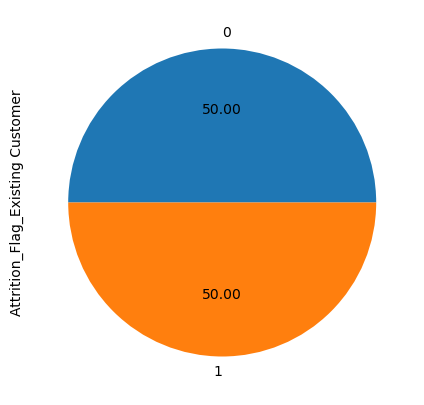

In [65]:
ros = RandomOverSampler(sampling_strategy=1) 
X_res_os, y_res_os = ros.fit_resample(X_train, Y_train)
y_res_os.value_counts().plot.pie(autopct='%.2f',figsize=(6, 5))

In [66]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

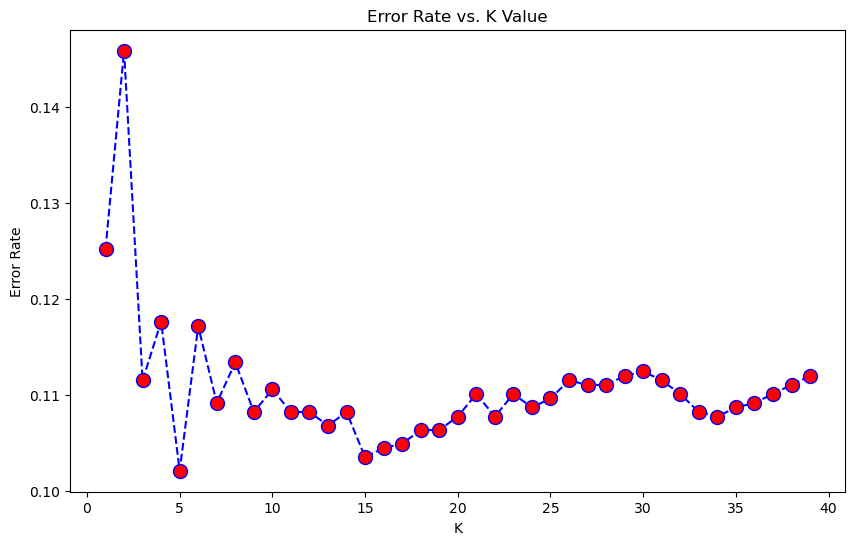

In [67]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

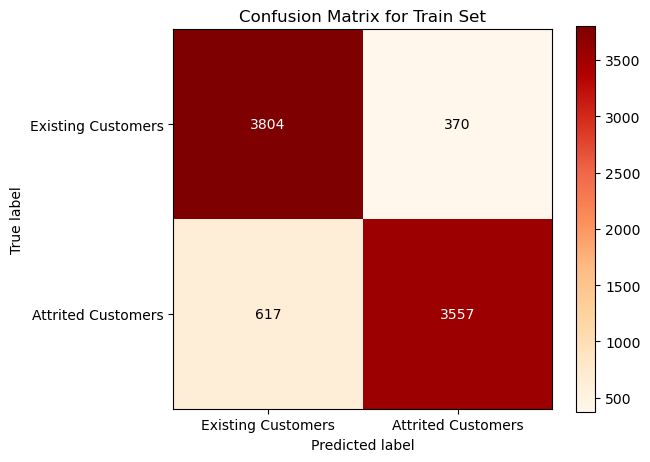

classification_report for train 

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      4174
           1       0.91      0.85      0.88      4174

    accuracy                           0.88      8348
   macro avg       0.88      0.88      0.88      8348
weighted avg       0.88      0.88      0.88      8348



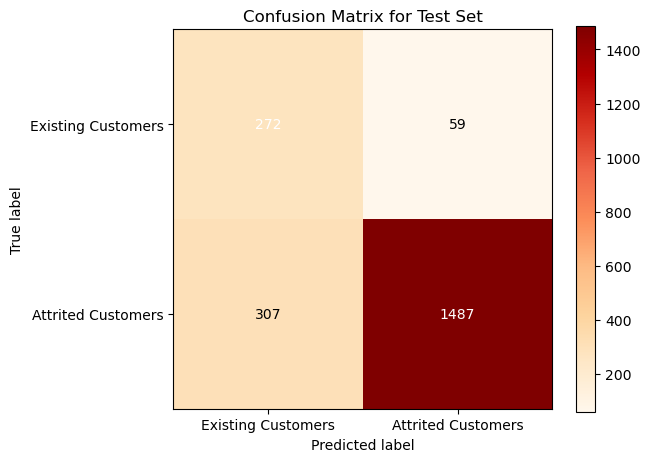

classification_report for testing 

              precision    recall  f1-score   support

           0       0.47      0.82      0.60       331
           1       0.96      0.83      0.89      1794

    accuracy                           0.83      2125
   macro avg       0.72      0.83      0.74      2125
weighted avg       0.89      0.83      0.84      2125



In [68]:
knn=KNeighborsClassifier(n_neighbors=23)
conf_train, report_train, conf_test, report_test = evaluate_model(knn, X_res_os, y_res_os, X_test, Y_test)
plot_confusion_matrix_with_counts(conf_train,'Train')
print('classification_report for train \n')
print(report_train)
plot_confusion_matrix_with_counts(conf_test,'Test')
print('classification_report for testing \n')
print(report_test)

In [69]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_data)

In [70]:
scaledx_train, scaledx_test, y_train, y_test = train_test_split(x_scaled,y_data , test_size=0.2, random_state=1)

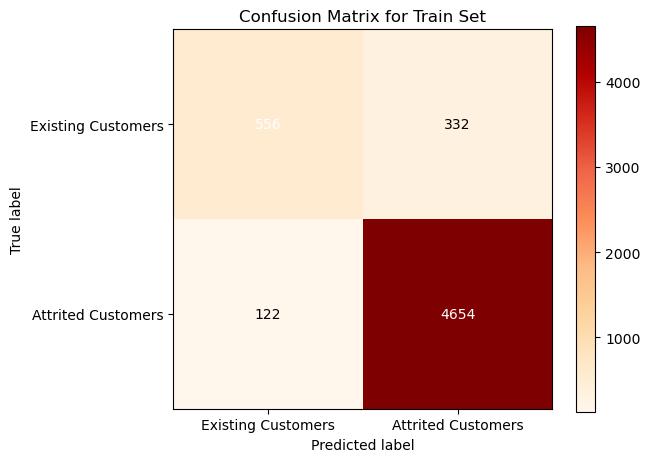

classification_report for train 

              precision    recall  f1-score   support

           0       0.82      0.63      0.71       888
           1       0.93      0.97      0.95      4776

    accuracy                           0.92      5664
   macro avg       0.88      0.80      0.83      5664
weighted avg       0.92      0.92      0.92      5664



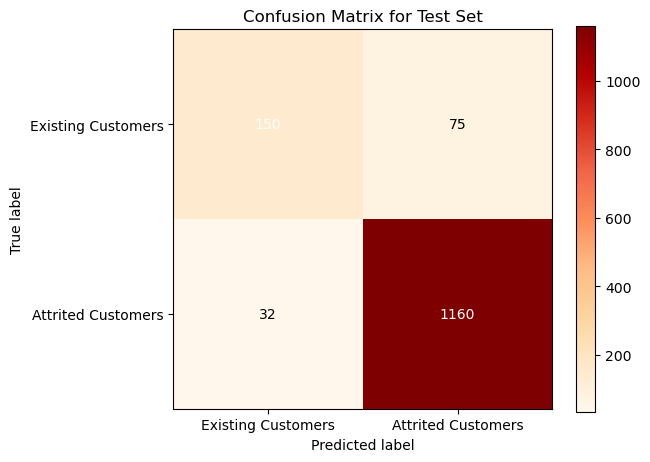

classification_report for testing 

              precision    recall  f1-score   support

           0       0.82      0.67      0.74       225
           1       0.94      0.97      0.96      1192

    accuracy                           0.92      1417
   macro avg       0.88      0.82      0.85      1417
weighted avg       0.92      0.92      0.92      1417



In [71]:
Sknn=KNeighborsClassifier(n_neighbors=23)
Sconf_train, Sreport_train, Sconf_test, Sreport_test = evaluate_model(Sknn, scaledx_train, y_train, scaledx_test, y_test)
plot_confusion_matrix_with_counts(Sconf_train,'Train')
print('classification_report for train \n')
print(Sreport_train)
plot_confusion_matrix_with_counts(Sconf_test,'Test')
print('classification_report for testing \n')
print(Sreport_test)

In [72]:
scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x_data)

In [73]:
normalizedx_train, normalizedx_test, y_train, y_test = train_test_split(x_normalized,y_data , test_size=0.2, random_state=1)

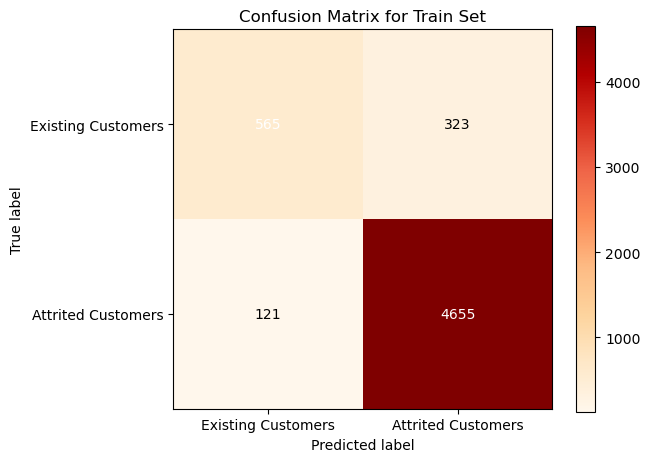

classification_report for train 

              precision    recall  f1-score   support

           0       0.82      0.64      0.72       888
           1       0.94      0.97      0.95      4776

    accuracy                           0.92      5664
   macro avg       0.88      0.81      0.84      5664
weighted avg       0.92      0.92      0.92      5664



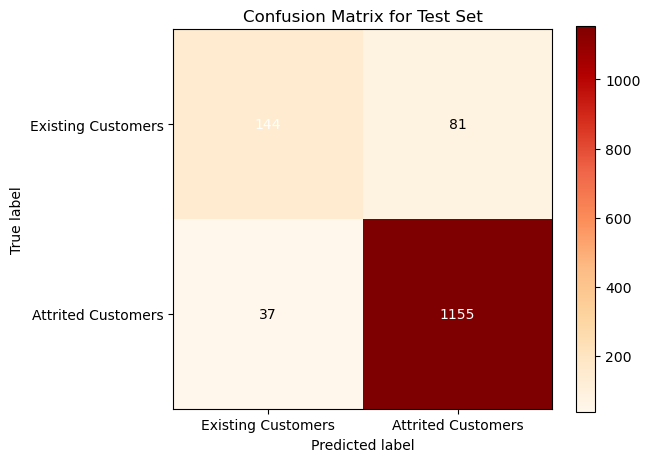

classification_report for testing 

              precision    recall  f1-score   support

           0       0.80      0.64      0.71       225
           1       0.93      0.97      0.95      1192

    accuracy                           0.92      1417
   macro avg       0.87      0.80      0.83      1417
weighted avg       0.91      0.92      0.91      1417



In [74]:
Nknn=KNeighborsClassifier(n_neighbors=23)
Nconf_train, Nreport_train, Nconf_test, Nreport_test = evaluate_model(Nknn, normalizedx_train, y_train, normalizedx_test, y_test)
plot_confusion_matrix_with_counts(Nconf_train,'Train')
print('classification_report for train \n')
print(Nreport_train)
plot_confusion_matrix_with_counts(Nconf_test,'Test')
print('classification_report for testing \n')
print(Nreport_test)

In [75]:
pca = PCA(n_components=5)  # Reduce to 5 principal components
x_reduced = pca.fit_transform(x_data)

In [76]:
reducedx_train, reducedx_test, y_train, y_test = train_test_split(x_reduced,y_data , test_size=0.2, random_state=42)

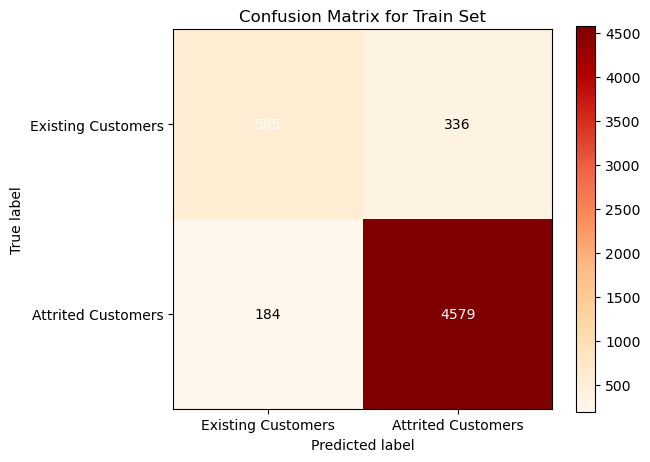

classification_report for train 

              precision    recall  f1-score   support

           0       0.75      0.63      0.68       901
           1       0.93      0.96      0.95      4763

    accuracy                           0.91      5664
   macro avg       0.84      0.79      0.82      5664
weighted avg       0.90      0.91      0.90      5664



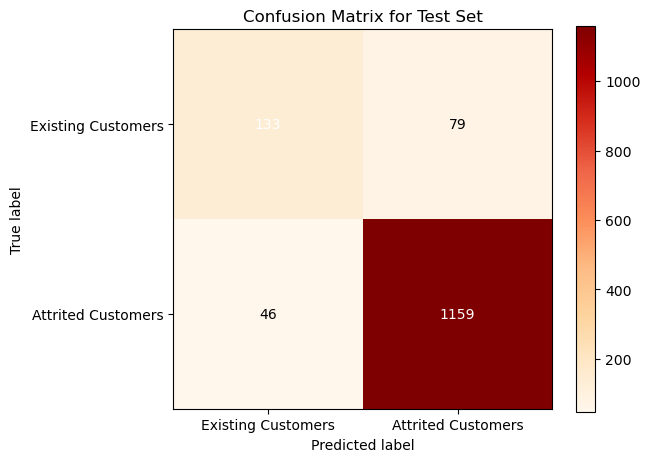

classification_report for testing 

              precision    recall  f1-score   support

           0       0.74      0.63      0.68       212
           1       0.94      0.96      0.95      1205

    accuracy                           0.91      1417
   macro avg       0.84      0.79      0.81      1417
weighted avg       0.91      0.91      0.91      1417



In [77]:
Dknn=KNeighborsClassifier(n_neighbors=23)
Dconf_train, Dreport_train, Dconf_test, Dreport_test = evaluate_model(Dknn, reducedx_train, y_train, reducedx_test, y_test)
plot_confusion_matrix_with_counts(Dconf_train,'Train')
print('classification_report for train \n')
print(Dreport_train)
plot_confusion_matrix_with_counts(Dconf_test,'Test')
print('classification_report for testing \n')
print(Dreport_test)

In [78]:
logmodel = LogisticRegression()
conf_train, report_train, conf_test, report_test =evaluate_model(logmodel, X_res_os, y_res_os, X_test, Y_test)


C:\Users\compusoft\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



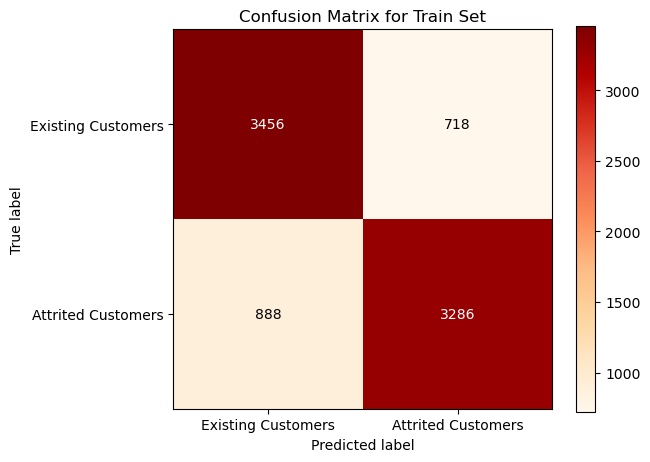

classification_report for train 

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      4174
           1       0.82      0.79      0.80      4174

    accuracy                           0.81      8348
   macro avg       0.81      0.81      0.81      8348
weighted avg       0.81      0.81      0.81      8348



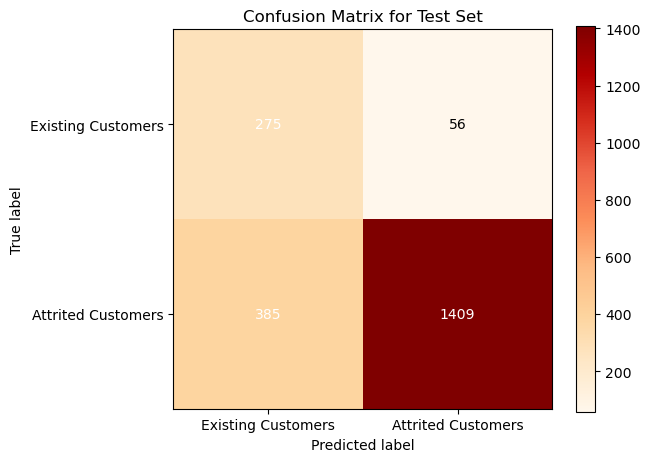

classification_report for testing 

              precision    recall  f1-score   support

           0       0.42      0.83      0.55       331
           1       0.96      0.79      0.86      1794

    accuracy                           0.79      2125
   macro avg       0.69      0.81      0.71      2125
weighted avg       0.88      0.79      0.82      2125



In [79]:
plot_confusion_matrix_with_counts(conf_train,'Train')
print('classification_report for train \n')
print(report_train)
plot_confusion_matrix_with_counts(conf_test,'Test')
print('classification_report for testing \n')
print(report_test)

C:\Users\compusoft\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\compusoft\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\compusoft\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\compusoft\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted sa

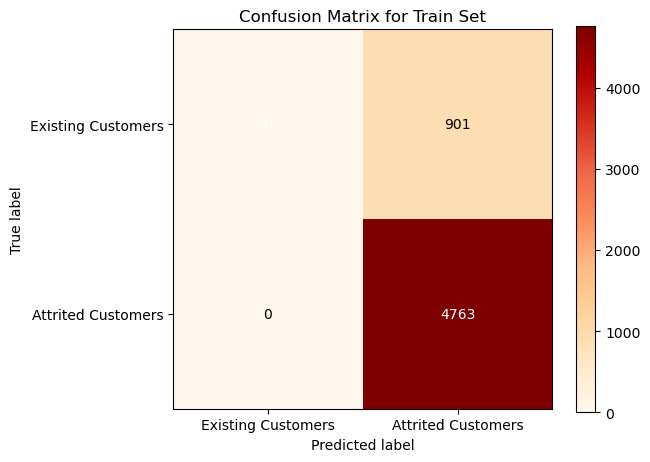

classification_report for train 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       901
           1       0.84      1.00      0.91      4763

    accuracy                           0.84      5664
   macro avg       0.42      0.50      0.46      5664
weighted avg       0.71      0.84      0.77      5664



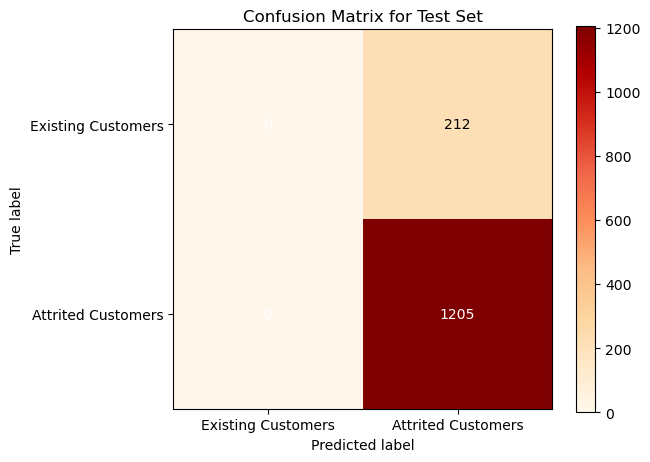

classification_report for testing 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       212
           1       0.85      1.00      0.92      1205

    accuracy                           0.85      1417
   macro avg       0.43      0.50      0.46      1417
weighted avg       0.72      0.85      0.78      1417



In [80]:
Slogmodel = LogisticRegression()
Sconf_train, Sreport_train, Sconf_test, Sreport_test =evaluate_model(Slogmodel,scaledx_train, y_train, scaledx_test, y_test)
plot_confusion_matrix_with_counts(Sconf_train,'Train')
print('classification_report for train \n')
print(Sreport_train)
plot_confusion_matrix_with_counts(Sconf_test,'Test')
print('classification_report for testing \n')
print(Sreport_test)

C:\Users\compusoft\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\compusoft\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\compusoft\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\compusoft\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted sa

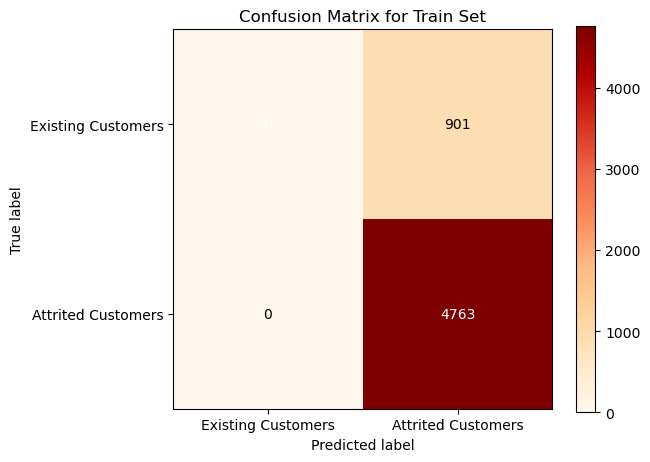

classification_report for train 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       901
           1       0.84      1.00      0.91      4763

    accuracy                           0.84      5664
   macro avg       0.42      0.50      0.46      5664
weighted avg       0.71      0.84      0.77      5664



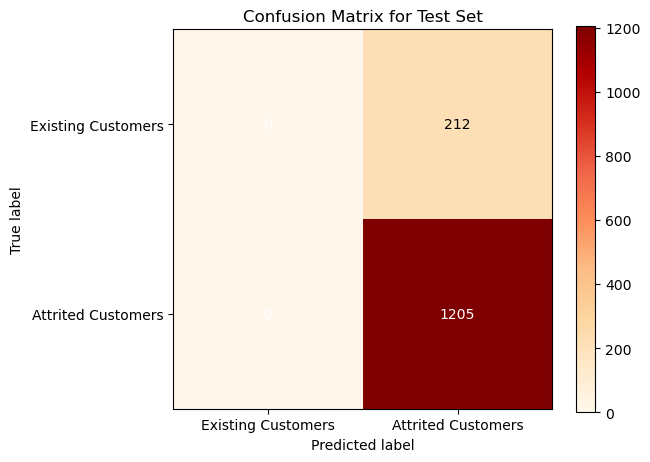

classification_report for testing 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       212
           1       0.85      1.00      0.92      1205

    accuracy                           0.85      1417
   macro avg       0.43      0.50      0.46      1417
weighted avg       0.72      0.85      0.78      1417



In [81]:
Nlogmodel = LogisticRegression()
Nconf_train, Nreport_train, Nconf_test, Nreport_test =evaluate_model(Nlogmodel, normalizedx_train, y_train, normalizedx_test, y_test)
plot_confusion_matrix_with_counts(Nconf_train,'Train')
print('classification_report for train \n')
print(Nreport_train)
plot_confusion_matrix_with_counts(Nconf_test,'Test')
print('classification_report for testing \n')
print(Nreport_test)


C:\Users\compusoft\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



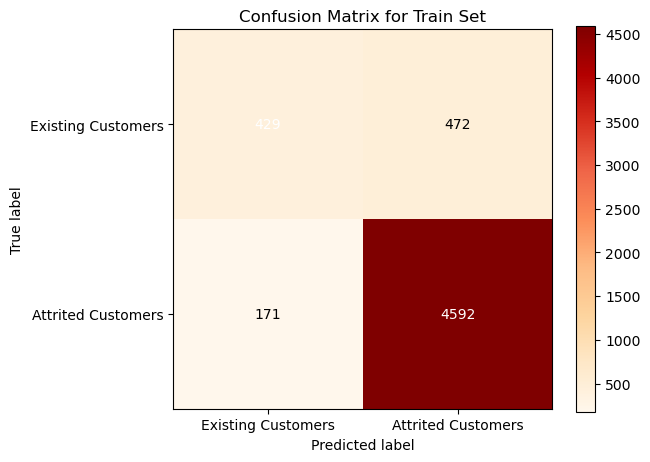

classification_report for train 

              precision    recall  f1-score   support

           0       0.71      0.48      0.57       901
           1       0.91      0.96      0.93      4763

    accuracy                           0.89      5664
   macro avg       0.81      0.72      0.75      5664
weighted avg       0.88      0.89      0.88      5664



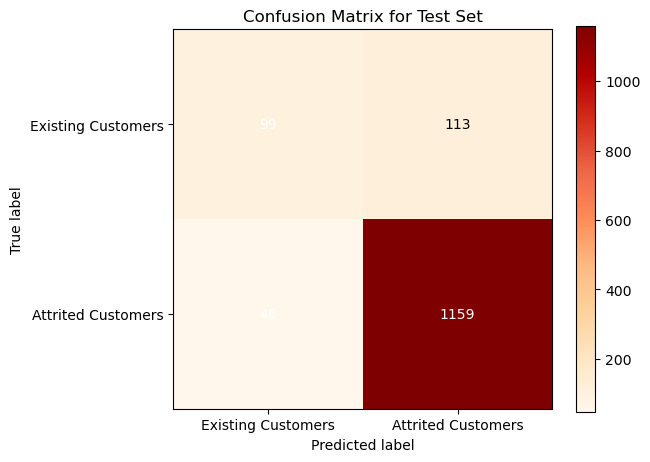

classification_report for testing 

              precision    recall  f1-score   support

           0       0.68      0.47      0.55       212
           1       0.91      0.96      0.94      1205

    accuracy                           0.89      1417
   macro avg       0.80      0.71      0.75      1417
weighted avg       0.88      0.89      0.88      1417



In [82]:
DRlogmodel = LogisticRegression()
DRconf_train, DRreport_train, DRconf_test, DRreport_test =evaluate_model(DRlogmodel,reducedx_train, y_train, reducedx_test, y_test)
plot_confusion_matrix_with_counts(DRconf_train,'Train')
print('classification_report for train \n')
print(DRreport_train)
plot_confusion_matrix_with_counts(DRconf_test,'Test')
print('classification_report for testing \n')
print(DRreport_test)


In [83]:
from sklearn.svm import SVC

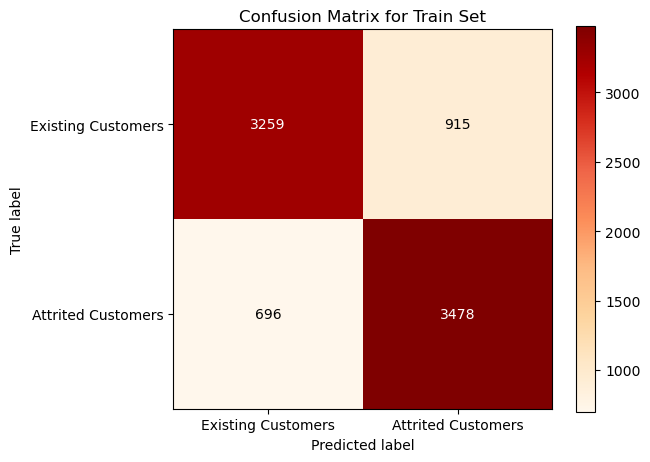

classification_report for train 

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      4174
           1       0.79      0.83      0.81      4174

    accuracy                           0.81      8348
   macro avg       0.81      0.81      0.81      8348
weighted avg       0.81      0.81      0.81      8348



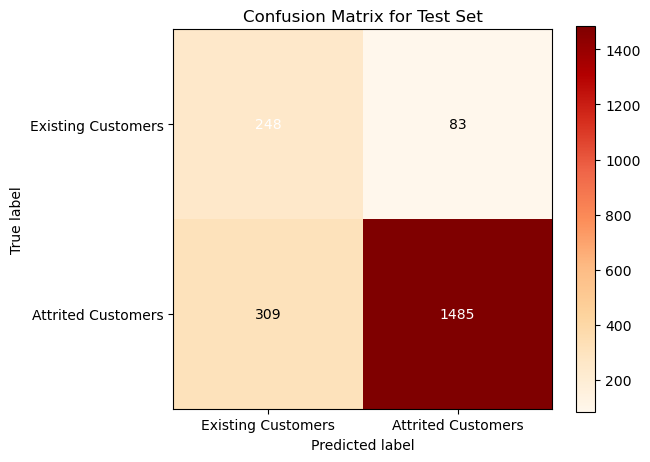

classification_report for testing 

              precision    recall  f1-score   support

           0       0.45      0.75      0.56       331
           1       0.95      0.83      0.88      1794

    accuracy                           0.82      2125
   macro avg       0.70      0.79      0.72      2125
weighted avg       0.87      0.82      0.83      2125



In [84]:
model = SVC()
conf_train, report_train, conf_test, report_test = evaluate_model(model, X_res_os, y_res_os, X_test, Y_test)
plot_confusion_matrix_with_counts(conf_train,'Train')
print('classification_report for train \n')
print(report_train)
plot_confusion_matrix_with_counts(conf_test,'Test')
print('classification_report for testing \n')
print(report_test)

C:\Users\compusoft\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\compusoft\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\compusoft\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\compusoft\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted sa

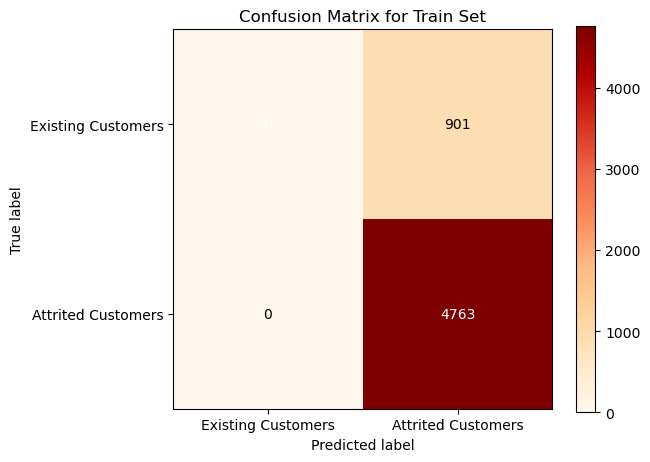

classification_report for train 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       901
           1       0.84      1.00      0.91      4763

    accuracy                           0.84      5664
   macro avg       0.42      0.50      0.46      5664
weighted avg       0.71      0.84      0.77      5664



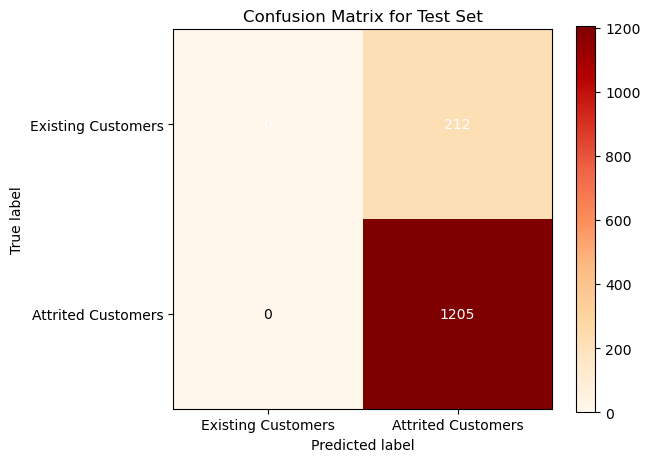

classification_report for testing 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       212
           1       0.85      1.00      0.92      1205

    accuracy                           0.85      1417
   macro avg       0.43      0.50      0.46      1417
weighted avg       0.72      0.85      0.78      1417



In [85]:
Smodel = SVC()
Sconf_train, Sreport_train, Sconf_test, Sreport_test =evaluate_model(Smodel,scaledx_train, y_train, scaledx_test, y_test)
plot_confusion_matrix_with_counts(Sconf_train,'Train')
print('classification_report for train \n')
print(Sreport_train)
plot_confusion_matrix_with_counts(Sconf_test,'Test')
print('classification_report for testing \n')
print(Sreport_test)

C:\Users\compusoft\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\compusoft\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\compusoft\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\compusoft\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted sa

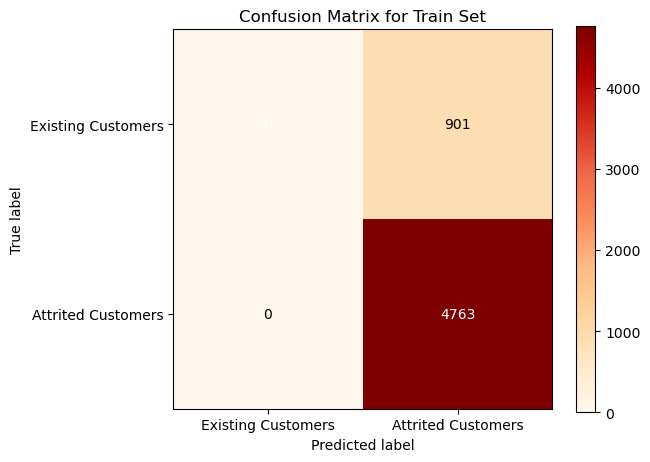

classification_report for train 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       901
           1       0.84      1.00      0.91      4763

    accuracy                           0.84      5664
   macro avg       0.42      0.50      0.46      5664
weighted avg       0.71      0.84      0.77      5664



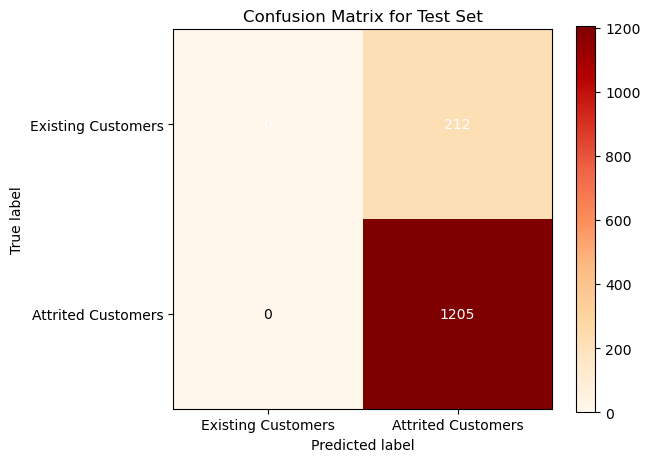

classification_report for testing 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       212
           1       0.85      1.00      0.92      1205

    accuracy                           0.85      1417
   macro avg       0.43      0.50      0.46      1417
weighted avg       0.72      0.85      0.78      1417



In [86]:
Nmodel = SVC()
Nconf_train, Nreport_train, Nconf_test, Nreport_test =evaluate_model(Nmodel, normalizedx_train, y_train, normalizedx_test, y_test)
plot_confusion_matrix_with_counts(Nconf_train,'Train')
print('classification_report for train \n')
print(Nreport_train)
plot_confusion_matrix_with_counts(Nconf_test,'Test')
print('classification_report for testing \n')
print(Nreport_test)


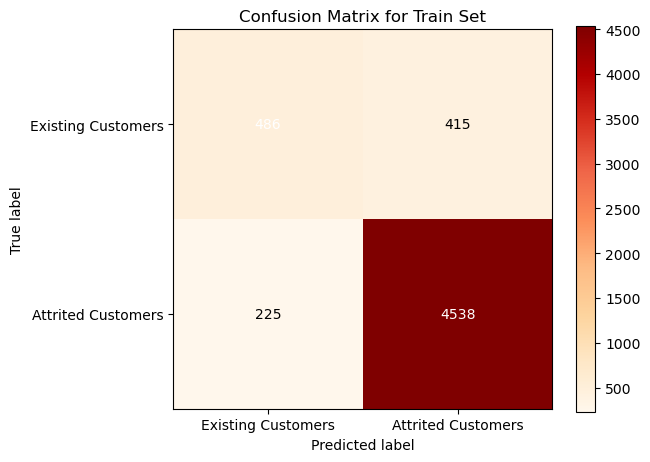

classification_report for train 

              precision    recall  f1-score   support

           0       0.68      0.54      0.60       901
           1       0.92      0.95      0.93      4763

    accuracy                           0.89      5664
   macro avg       0.80      0.75      0.77      5664
weighted avg       0.88      0.89      0.88      5664



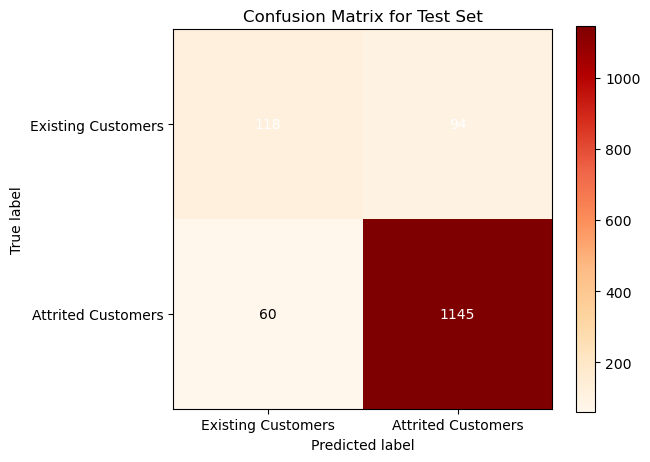

classification_report for testing 

              precision    recall  f1-score   support

           0       0.66      0.56      0.61       212
           1       0.92      0.95      0.94      1205

    accuracy                           0.89      1417
   macro avg       0.79      0.75      0.77      1417
weighted avg       0.89      0.89      0.89      1417



In [87]:
Dmodel = SVC()
DRconf_train, DRreport_train, DRconf_test, DRreport_test =evaluate_model(Dmodel,reducedx_train, y_train, reducedx_test, y_test)
plot_confusion_matrix_with_counts(DRconf_train,'Train')
print('classification_report for train \n')
print(DRreport_train)
plot_confusion_matrix_with_counts(DRconf_test,'Test')
print('classification_report for testing \n')
print(DRreport_test)


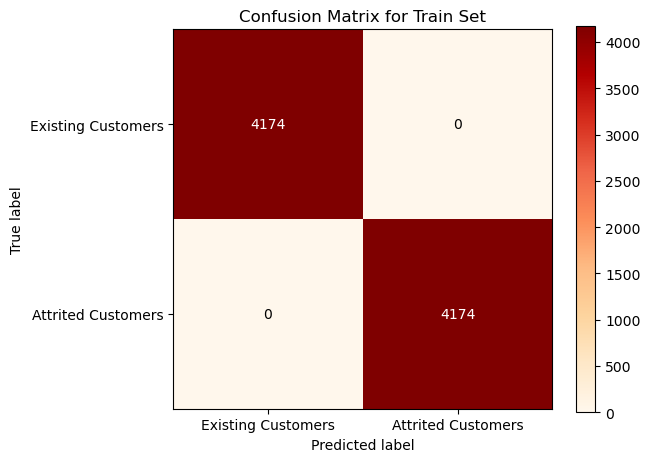

classification_report for train 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4174
           1       1.00      1.00      1.00      4174

    accuracy                           1.00      8348
   macro avg       1.00      1.00      1.00      8348
weighted avg       1.00      1.00      1.00      8348



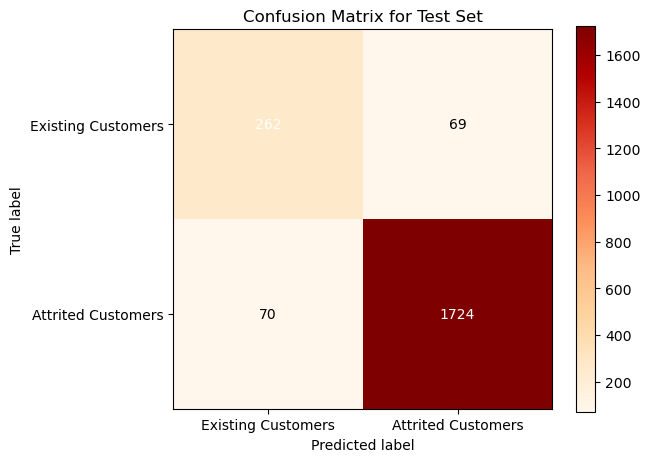

classification_report for testing 

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       331
           1       0.96      0.96      0.96      1794

    accuracy                           0.93      2125
   macro avg       0.88      0.88      0.88      2125
weighted avg       0.93      0.93      0.93      2125



In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
conf_train, report_train, conf_test, report_test = evaluate_model(rfc, X_res_os, y_res_os, X_test, Y_test)
plot_confusion_matrix_with_counts(conf_train,'Train')
print('classification_report for train \n')
print(report_train)
plot_confusion_matrix_with_counts(conf_test,'Test')
print('classification_report for testing \n')
print(report_test)


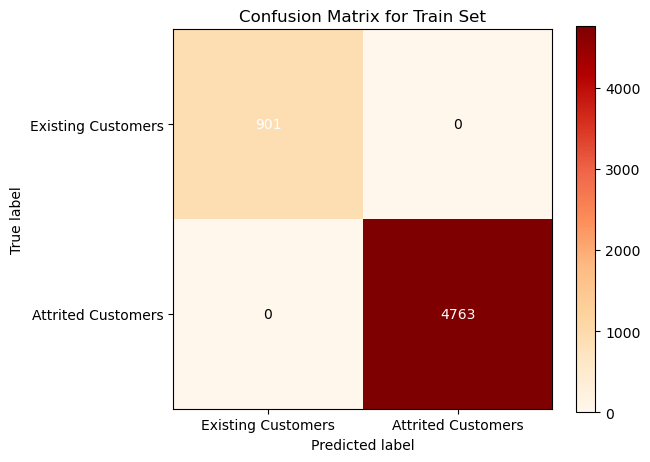

classification_report for train 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       901
           1       1.00      1.00      1.00      4763

    accuracy                           1.00      5664
   macro avg       1.00      1.00      1.00      5664
weighted avg       1.00      1.00      1.00      5664



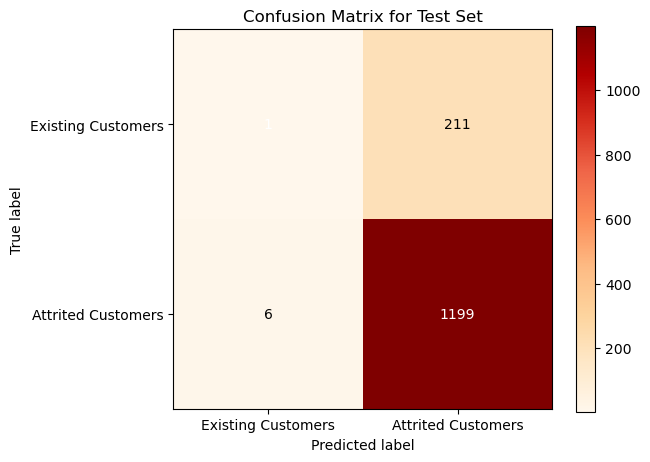

classification_report for testing 

              precision    recall  f1-score   support

           0       0.14      0.00      0.01       212
           1       0.85      1.00      0.92      1205

    accuracy                           0.85      1417
   macro avg       0.50      0.50      0.46      1417
weighted avg       0.74      0.85      0.78      1417



In [89]:
Srfc = RandomForestClassifier(n_estimators=100)
Sconf_train, Sreport_train, Sconf_test, Sreport_test =evaluate_model(Srfc,scaledx_train, y_train, scaledx_test, y_test)
plot_confusion_matrix_with_counts(Sconf_train,'Train')
print('classification_report for train \n')
print(Sreport_train)
plot_confusion_matrix_with_counts(Sconf_test,'Test')
print('classification_report for testing \n')
print(Sreport_test)

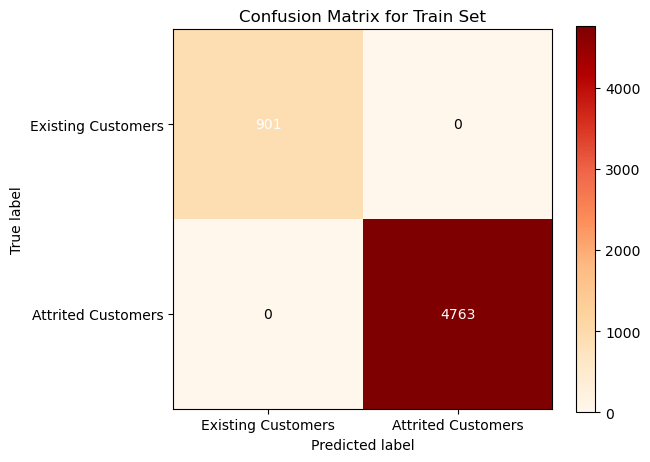

classification_report for train 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       901
           1       1.00      1.00      1.00      4763

    accuracy                           1.00      5664
   macro avg       1.00      1.00      1.00      5664
weighted avg       1.00      1.00      1.00      5664



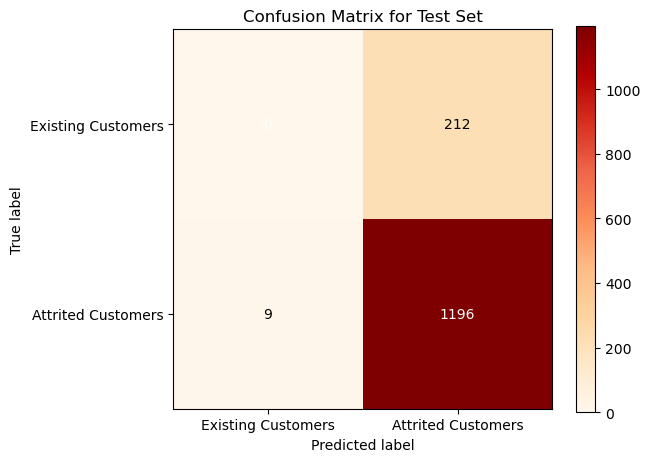

classification_report for testing 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       212
           1       0.85      0.99      0.92      1205

    accuracy                           0.84      1417
   macro avg       0.42      0.50      0.46      1417
weighted avg       0.72      0.84      0.78      1417



In [90]:
Nrfc = RandomForestClassifier(n_estimators=100)
Nconf_train, Nreport_train, Nconf_test, Nreport_test =evaluate_model(Nrfc, normalizedx_train, y_train, normalizedx_test, y_test)
plot_confusion_matrix_with_counts(Nconf_train,'Train')
print('classification_report for train \n')
print(Nreport_train)
plot_confusion_matrix_with_counts(Nconf_test,'Test')
print('classification_report for testing \n')
print(Nreport_test)


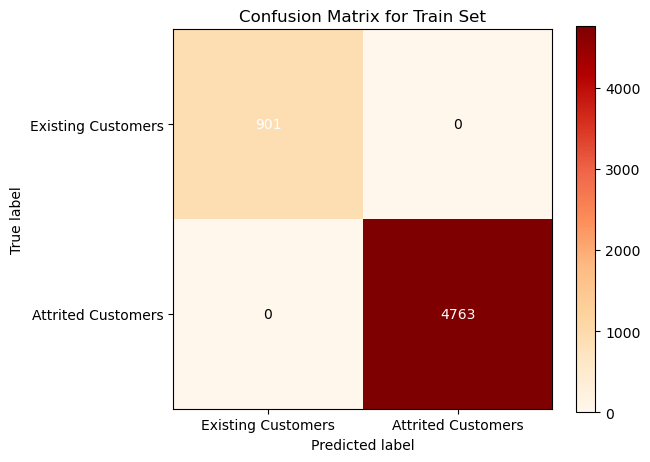

classification_report for train 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       901
           1       1.00      1.00      1.00      4763

    accuracy                           1.00      5664
   macro avg       1.00      1.00      1.00      5664
weighted avg       1.00      1.00      1.00      5664



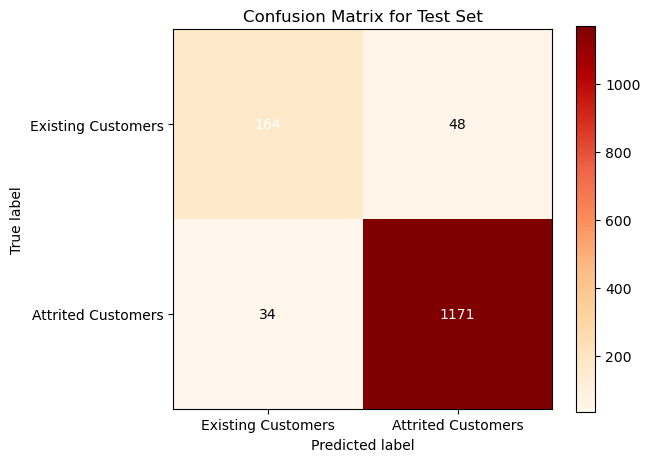

classification_report for testing 

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       212
           1       0.96      0.97      0.97      1205

    accuracy                           0.94      1417
   macro avg       0.89      0.87      0.88      1417
weighted avg       0.94      0.94      0.94      1417



In [91]:
Drfc = RandomForestClassifier(n_estimators=100)
DRconf_train, DRreport_train, DRconf_test, DRreport_test =evaluate_model(Drfc,reducedx_train, y_train, reducedx_test, y_test)
plot_confusion_matrix_with_counts(DRconf_train,'Train')
print('classification_report for train \n')
print(DRreport_train)
plot_confusion_matrix_with_counts(DRconf_test,'Test')
print('classification_report for testing \n')
print(DRreport_test)


In [92]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

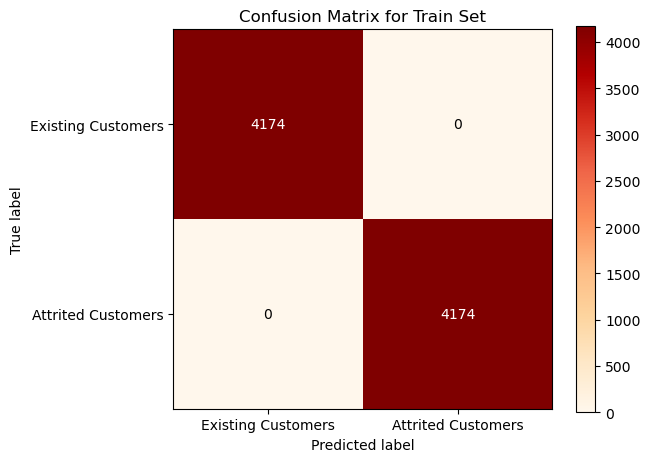

classification_report for train 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4174
           1       1.00      1.00      1.00      4174

    accuracy                           1.00      8348
   macro avg       1.00      1.00      1.00      8348
weighted avg       1.00      1.00      1.00      8348



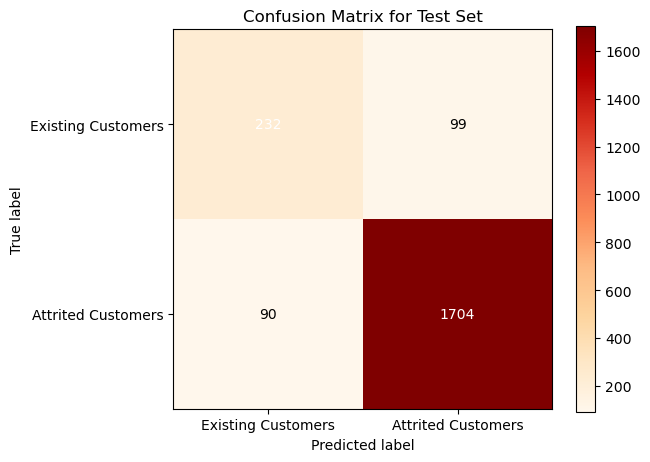

classification_report for testing 

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       331
           1       0.95      0.95      0.95      1794

    accuracy                           0.91      2125
   macro avg       0.83      0.83      0.83      2125
weighted avg       0.91      0.91      0.91      2125



In [93]:
dtree = DecisionTreeClassifier()
conf_train, report_train, conf_test, report_test = evaluate_model(dtree, X_res_os, y_res_os, X_test, Y_test)
plot_confusion_matrix_with_counts(conf_train,'Train')
print('classification_report for train \n')
print(report_train)
plot_confusion_matrix_with_counts(conf_test,'Test')
print('classification_report for testing \n')
print(report_test)


In [94]:
features = list(X_train)
features

['Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Contacts_Count_12_mon',
 'Total_Revolving_Bal',
 'Avg_Utilization_Ratio']

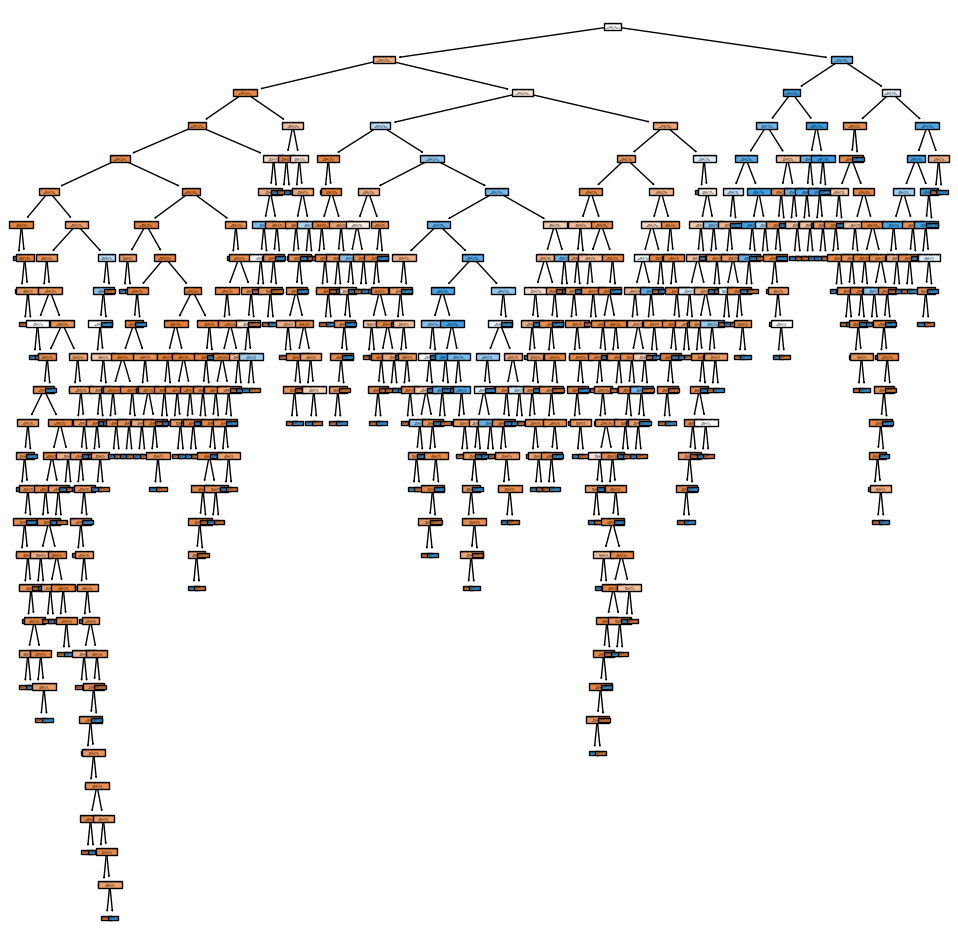

In [95]:
import matplotlib.pyplot as plt
# Plot the decision tree
plt.figure(figsize=(12, 12))
plot_tree(dtree, filled=True, feature_names=features)
plt.show()

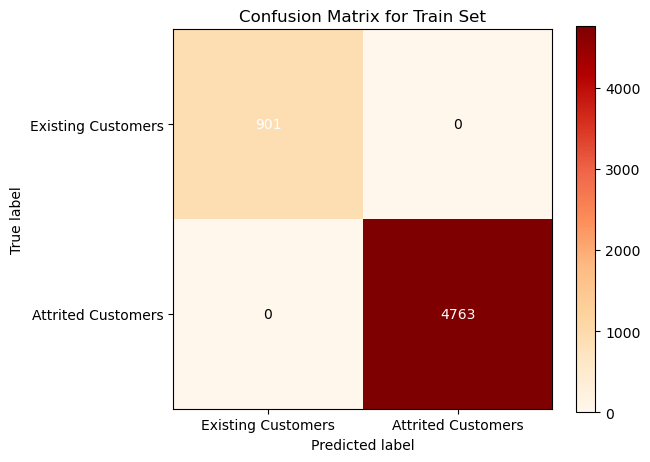

classification_report for train 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       901
           1       1.00      1.00      1.00      4763

    accuracy                           1.00      5664
   macro avg       1.00      1.00      1.00      5664
weighted avg       1.00      1.00      1.00      5664



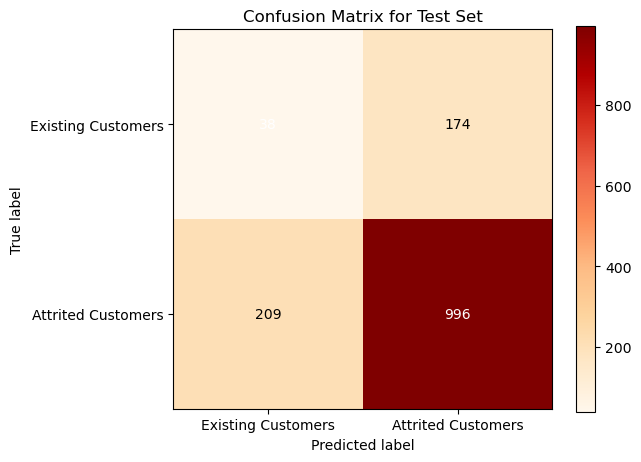

classification_report for testing 

              precision    recall  f1-score   support

           0       0.15      0.18      0.17       212
           1       0.85      0.83      0.84      1205

    accuracy                           0.73      1417
   macro avg       0.50      0.50      0.50      1417
weighted avg       0.75      0.73      0.74      1417



In [96]:
Sdtree = DecisionTreeClassifier()
Sconf_train, Sreport_train, Sconf_test, Sreport_test =evaluate_model(Sdtree,scaledx_train, y_train, scaledx_test, y_test)
plot_confusion_matrix_with_counts(Sconf_train,'Train')
print('classification_report for train \n')
print(Sreport_train)
plot_confusion_matrix_with_counts(Sconf_test,'Test')
print('classification_report for testing \n')
print(Sreport_test)

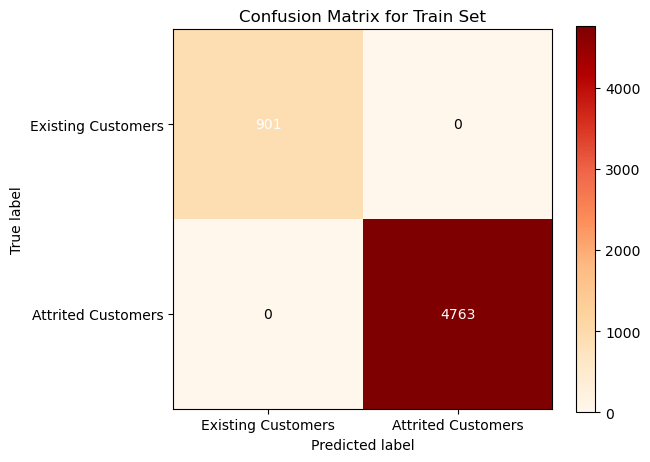

classification_report for train 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       901
           1       1.00      1.00      1.00      4763

    accuracy                           1.00      5664
   macro avg       1.00      1.00      1.00      5664
weighted avg       1.00      1.00      1.00      5664



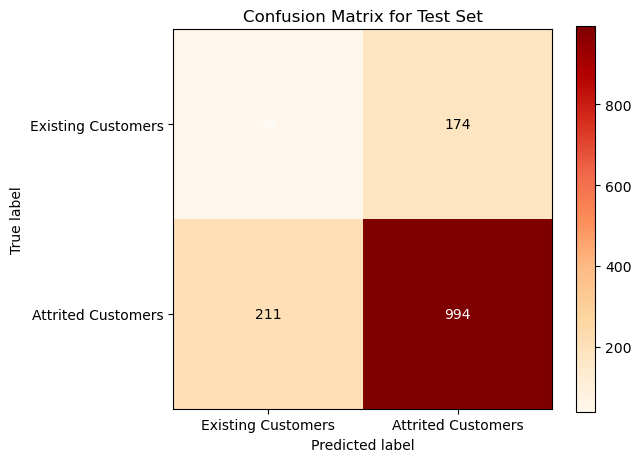

classification_report for testing 

              precision    recall  f1-score   support

           0       0.15      0.18      0.16       212
           1       0.85      0.82      0.84      1205

    accuracy                           0.73      1417
   macro avg       0.50      0.50      0.50      1417
weighted avg       0.75      0.73      0.74      1417



In [97]:
Ndtree = DecisionTreeClassifier()
Nconf_train, Nreport_train, Nconf_test, Nreport_test =evaluate_model(Ndtree, normalizedx_train, y_train, normalizedx_test, y_test)
plot_confusion_matrix_with_counts(Nconf_train,'Train')
print('classification_report for train \n')
print(Nreport_train)
plot_confusion_matrix_with_counts(Nconf_test,'Test')
print('classification_report for testing \n')
print(Nreport_test)


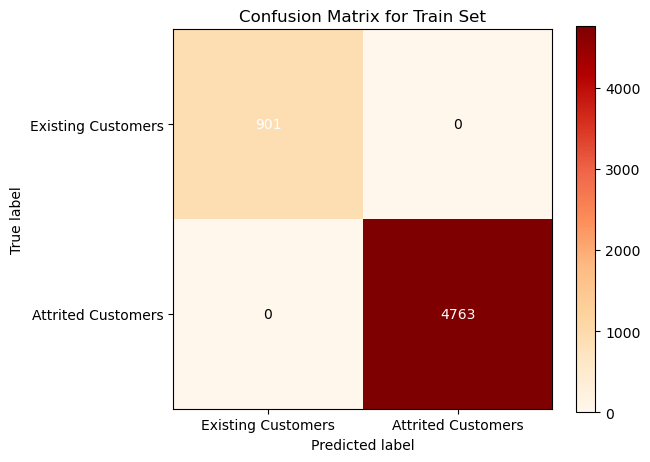

classification_report for train 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       901
           1       1.00      1.00      1.00      4763

    accuracy                           1.00      5664
   macro avg       1.00      1.00      1.00      5664
weighted avg       1.00      1.00      1.00      5664



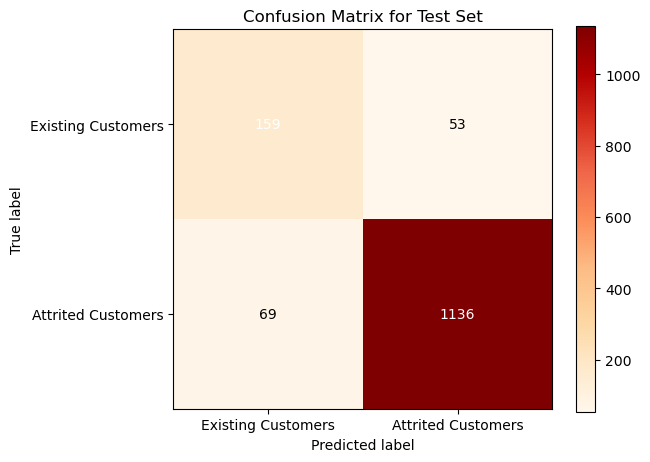

classification_report for testing 

              precision    recall  f1-score   support

           0       0.70      0.75      0.72       212
           1       0.96      0.94      0.95      1205

    accuracy                           0.91      1417
   macro avg       0.83      0.85      0.84      1417
weighted avg       0.92      0.91      0.92      1417



In [98]:
DRdtree = DecisionTreeClassifier()
DRconf_train, DRreport_train, DRconf_test, DRreport_test =evaluate_model(DRdtree,reducedx_train, y_train, reducedx_test, y_test)
plot_confusion_matrix_with_counts(DRconf_train,'Train')
print('classification_report for train \n')
print(DRreport_train)
plot_confusion_matrix_with_counts(DRconf_test,'Test')
print('classification_report for testing \n')
print(DRreport_test)


In [99]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

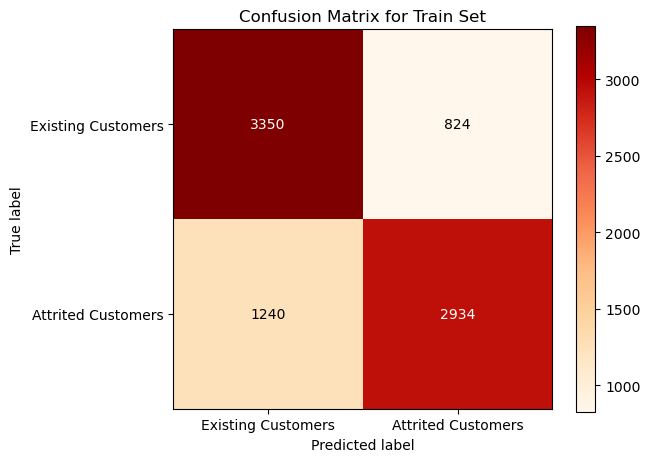

classification_report for train 

              precision    recall  f1-score   support

           0       0.73      0.80      0.76      4174
           1       0.78      0.70      0.74      4174

    accuracy                           0.75      8348
   macro avg       0.76      0.75      0.75      8348
weighted avg       0.76      0.75      0.75      8348



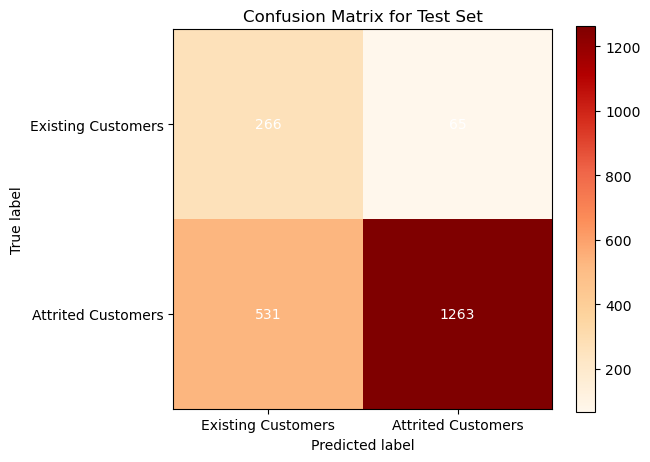

classification_report for testing 

              precision    recall  f1-score   support

           0       0.33      0.80      0.47       331
           1       0.95      0.70      0.81      1794

    accuracy                           0.72      2125
   macro avg       0.64      0.75      0.64      2125
weighted avg       0.85      0.72      0.76      2125



In [100]:
Gmodel = GaussianNB()
conf_train, report_train, conf_test, report_test = evaluate_model(Gmodel, X_res_os, y_res_os, X_test, Y_test)
plot_confusion_matrix_with_counts(conf_train,'Train')
print('classification_report for train \n')
print(report_train)
plot_confusion_matrix_with_counts(conf_test,'Test')
print('classification_report for testing \n')
print(report_test)


C:\Users\compusoft\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\compusoft\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\compusoft\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\compusoft\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted sa

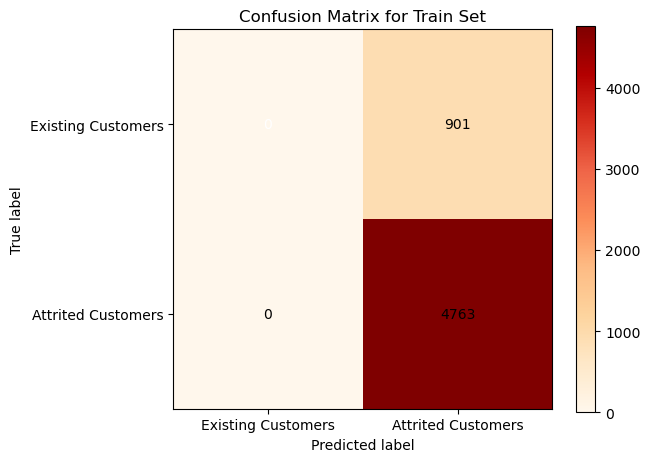

classification_report for train 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       901
           1       0.84      1.00      0.91      4763

    accuracy                           0.84      5664
   macro avg       0.42      0.50      0.46      5664
weighted avg       0.71      0.84      0.77      5664



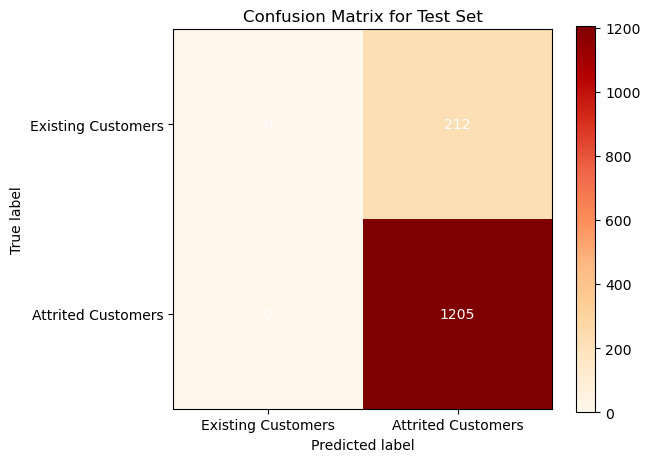

classification_report for testing 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       212
           1       0.85      1.00      0.92      1205

    accuracy                           0.85      1417
   macro avg       0.43      0.50      0.46      1417
weighted avg       0.72      0.85      0.78      1417



In [101]:
SGmodel = GaussianNB()
Sconf_train, Sreport_train, Sconf_test, Sreport_test =evaluate_model(SGmodel,scaledx_train, y_train, scaledx_test, y_test)
plot_confusion_matrix_with_counts(Sconf_train,'Train')
print('classification_report for train \n')
print(Sreport_train)
plot_confusion_matrix_with_counts(Sconf_test,'Test')
print('classification_report for testing \n')
print(Sreport_test)

C:\Users\compusoft\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\compusoft\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\compusoft\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\compusoft\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted sa

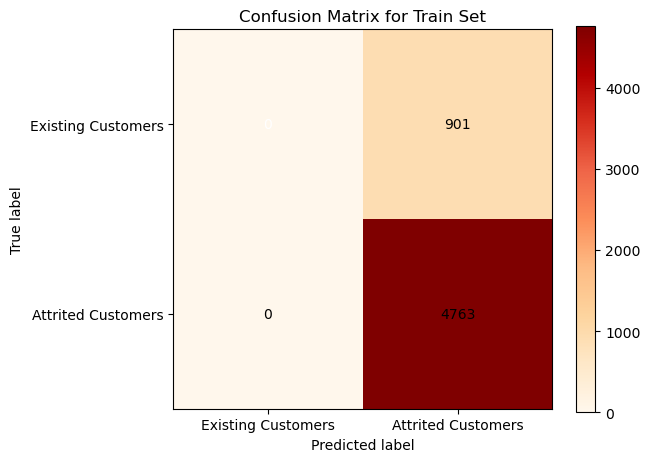

classification_report for train 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       901
           1       0.84      1.00      0.91      4763

    accuracy                           0.84      5664
   macro avg       0.42      0.50      0.46      5664
weighted avg       0.71      0.84      0.77      5664



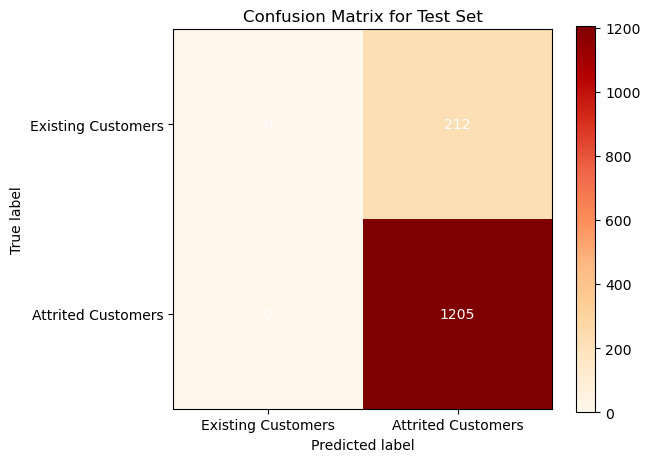

classification_report for testing 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       212
           1       0.85      1.00      0.92      1205

    accuracy                           0.85      1417
   macro avg       0.43      0.50      0.46      1417
weighted avg       0.72      0.85      0.78      1417



In [102]:
NGmodel = GaussianNB()
Nconf_train, Nreport_train, Nconf_test, Nreport_test =evaluate_model(NGmodel, normalizedx_train, y_train, normalizedx_test, y_test)
plot_confusion_matrix_with_counts(Nconf_train,'Train')
print('classification_report for train \n')
print(Nreport_train)
plot_confusion_matrix_with_counts(Nconf_test,'Test')
print('classification_report for testing \n')
print(Nreport_test)


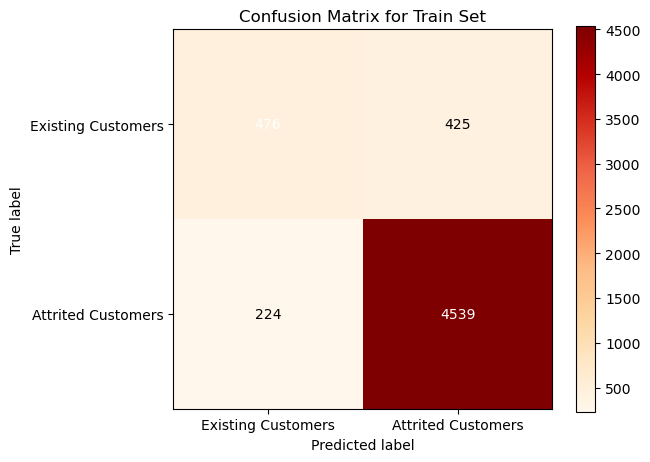

classification_report for train 

              precision    recall  f1-score   support

           0       0.68      0.53      0.59       901
           1       0.91      0.95      0.93      4763

    accuracy                           0.89      5664
   macro avg       0.80      0.74      0.76      5664
weighted avg       0.88      0.89      0.88      5664



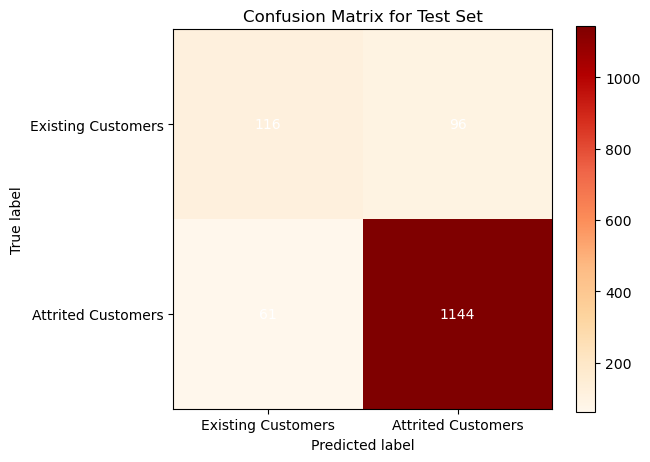

classification_report for testing 

              precision    recall  f1-score   support

           0       0.66      0.55      0.60       212
           1       0.92      0.95      0.94      1205

    accuracy                           0.89      1417
   macro avg       0.79      0.75      0.77      1417
weighted avg       0.88      0.89      0.89      1417



In [103]:
DRGmodel = GaussianNB()
DRconf_train, DRreport_train, DRconf_test, DRreport_test =evaluate_model(DRGmodel,reducedx_train, y_train, reducedx_test, y_test)
plot_confusion_matrix_with_counts(DRconf_train,'Train')
print('classification_report for train \n')
print(DRreport_train)
plot_confusion_matrix_with_counts(DRconf_test,'Test')
print('classification_report for testing \n')
print(DRreport_test)

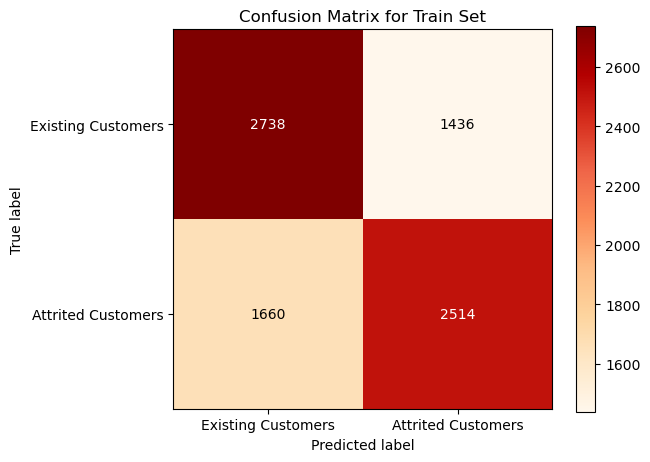

classification_report for train 

              precision    recall  f1-score   support

           0       0.62      0.66      0.64      4174
           1       0.64      0.60      0.62      4174

    accuracy                           0.63      8348
   macro avg       0.63      0.63      0.63      8348
weighted avg       0.63      0.63      0.63      8348



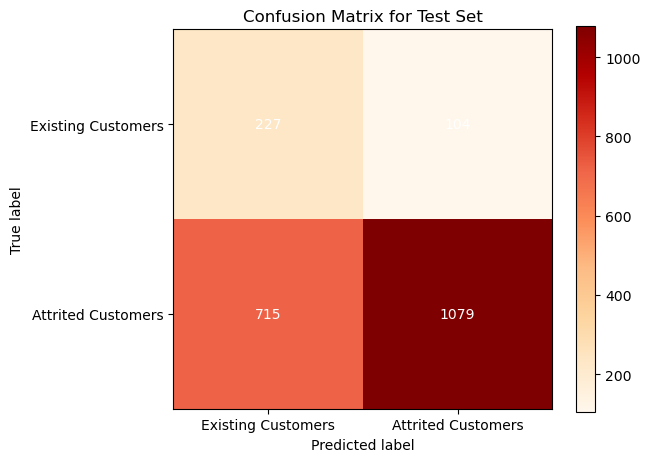

classification_report for testing 

              precision    recall  f1-score   support

           0       0.24      0.69      0.36       331
           1       0.91      0.60      0.72      1794

    accuracy                           0.61      2125
   macro avg       0.58      0.64      0.54      2125
weighted avg       0.81      0.61      0.67      2125



In [104]:
Mmodel = MultinomialNB()
conf_train, report_train, conf_test, report_test = evaluate_model(Mmodel, X_res_os, y_res_os, X_test, Y_test)
plot_confusion_matrix_with_counts(conf_train,'Train')
print('classification_report for train \n')
print(report_train)
plot_confusion_matrix_with_counts(conf_test,'Test')
print('classification_report for testing \n')
print(report_test)


# Encoding

In [105]:
Attrition_Flag = {'Existing Customer':0, 'Attrited Customer':1}
df.replace(Attrition_Flag, inplace=True)

In [106]:
df['Attrition_Flag'].value_counts()

0    5968
1    1113
Name: Attrition_Flag, dtype: int64

In [107]:
Education_Level = {'Graduate':0, 'High School':1, 'Uneducated':2,'College':3,'Post-Graduate':4,'Doctorate':5}
df.replace(Education_Level, inplace=True)

In [108]:
df['Education_Level'].value_counts()

0    2591
1    1653
2    1204
3     844
4     431
5     358
Name: Education_Level, dtype: int64

In [109]:
Gender = {'F':0, 'M':1}
df.replace(Gender, inplace=True)

In [110]:
df['Gender'].value_counts()

1    3706
0    3375
Name: Gender, dtype: int64

In [111]:
marital_status = {'Single':0, 'Married':1, 'Divorced':2}
df.replace(marital_status, inplace=True)

In [112]:
df['Marital_Status'].value_counts()

1    3564
0    2948
2     569
Name: Marital_Status, dtype: int64

In [113]:
Income_Category = {'Less than $40K':0, '$40K - $60K':1, '$80K - $120K':2,'$60K - $80K':3,'$120K +':4}
df.replace(Income_Category, inplace=True)

In [114]:
df['Income_Category'].value_counts()

0    2792
1    1412
2    1202
3    1103
4     572
Name: Income_Category, dtype: int64

In [115]:
Card_Category = {'Blue':0, 'Silver':1, 'Gold':2,'Platinum':3}
df.replace(Card_Category, inplace=True)

In [116]:
df['Card_Category'].value_counts()

0    6598
1     391
2      81
3      11
Name: Card_Category, dtype: int64

In [117]:
df.head()

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0               0            45       1                3                1   
1               0            49       0                5                0   
2               0            51       1                3                0   
4               0            40       1                3                2   
5               0            44       1                2                0   

   Marital_Status  Income_Category  Card_Category  Months_on_book  \
0               1                3              0              39   
1               0                0              0              44   
2               1                2              0              36   
4               1                3              0              21   
5               1                1              0              36   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
4                         5                       1                      0   
5                         3                       1                      2   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
4        4716.0                    0           4716.0                 2.175   
5        4010.0                 1247           2763.0                 1.376   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
4              816              28                2.500                  0.000  
5             1088              24                0.846                  0.311

# Regression

In [118]:
x = df.drop(['Credit_Limit'], axis=1)
y = df['Credit_Limit']

In [119]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=42)

In [120]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score

In [121]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "SVR": SVR(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}

In [122]:
mae_scores = []
median_ae_scores = []
mse_scores = []
r2_scores = []
model_names = []
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    median_ae = median_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae_scores.append(mae)
    median_ae_scores.append(median_ae)
    mse_scores.append(mse)
    r2_scores.append(r2)
    model_names.append(name)

In [123]:
fig = go.Figure(data=[
    go.Bar(name='Mean Absolute Error', x=model_names, y=mae_scores),
    go.Bar(name='Median Absolute Error', x=model_names, y=median_ae_scores),
    go.Bar(name='Mean Squared Error', x=model_names, y=mse_scores),
    go.Bar(name='R-squared', x=model_names, y=r2_scores)
])
fig.update_layout(barmode='group', title='Evaluation Metrics for Regression Models', xaxis_title='Model', yaxis_title='Score')
fig.show()

In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [125]:
scaledx_train, scaledx_test, y_train, y_test = train_test_split(x_scaled,y , test_size=0.2, random_state=42)

In [126]:
for name, model in models.items():
    model.fit(scaledx_train, y_train)
    y_pred = model.predict(scaledx_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    median_ae = median_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae_scores.append(mae)
    median_ae_scores.append(median_ae)
    mse_scores.append(mse)
    r2_scores.append(r2)
    model_names.append(name)

In [127]:
fig = go.Figure(data=[
    go.Bar(name='Mean Absolute Error', x=model_names, y=mae_scores),
    go.Bar(name='Median Absolute Error', x=model_names, y=median_ae_scores),
    go.Bar(name='Mean Squared Error', x=model_names, y=mse_scores),
    go.Bar(name='R-squared', x=model_names, y=r2_scores)
])
fig.update_layout(barmode='group', title='Evaluation Metrics for Regression Models', xaxis_title='Model', yaxis_title='Score')
fig.show()

In [128]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)

In [129]:
normalizedx_train, normalizedx_test, y_train, y_test = train_test_split(x_normalized,y , test_size=0.2, random_state=42)

In [130]:
for name, model in models.items():
    model.fit(normalizedx_train, y_train)
    y_pred = model.predict(normalizedx_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    median_ae = median_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae_scores.append(mae)
    median_ae_scores.append(median_ae)
    mse_scores.append(mse)
    r2_scores.append(r2)
    model_names.append(name)

In [131]:
fig = go.Figure(data=[
    go.Bar(name='Mean Absolute Error', x=model_names, y=mae_scores),
    go.Bar(name='Median Absolute Error', x=model_names, y=median_ae_scores),
    go.Bar(name='Mean Squared Error', x=model_names, y=mse_scores),
    go.Bar(name='R-squared', x=model_names, y=r2_scores)
])
fig.update_layout(barmode='group', title='Evaluation Metrics for Regression Models', xaxis_title='Model', yaxis_title='Score')
fig.show()

In [132]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)  # Reduce to 5 principal components
x_reduced = pca.fit_transform(x)

In [133]:
reducedx_train, reducedx_test, y_train, y_test = train_test_split(x_reduced,y , test_size=0.2, random_state=42)

In [134]:
for name, model in models.items():
    model.fit(reducedx_train, y_train)
    y_pred = model.predict(reducedx_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    median_ae = median_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae_scores.append(mae)
    median_ae_scores.append(median_ae)
    mse_scores.append(mse)
    r2_scores.append(r2)
    model_names.append(name)

In [135]:
fig = go.Figure(data=[
    go.Bar(name='Mean Absolute Error', x=model_names, y=mae_scores),
    go.Bar(name='Median Absolute Error', x=model_names, y=median_ae_scores),
    go.Bar(name='Mean Squared Error', x=model_names, y=mse_scores),
    go.Bar(name='R-squared', x=model_names, y=r2_scores)
])
fig.update_layout(barmode='group', title='Evaluation Metrics for Regression Models', xaxis_title='Model', yaxis_title='Score')
fig.show()

In [136]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = pd.DataFrame(
    scaler.fit_transform(df), 
    columns=df.columns
)

df_scaled.head()

Attrition_Flag  Customer_Age    Gender  Dependent_count  Education_Level  \
0        -0.43185     -0.167610  0.954298         0.512710        -0.288980   
1        -0.43185      0.329862 -1.047890         2.061228        -0.965209   
2        -0.43185      0.578598  0.954298         0.512710        -0.965209   
3        -0.43185     -0.789449  0.954298         0.512710         0.387249   
4        -0.43185     -0.291978  0.954298        -0.261549        -0.965209   

   Marital_Status  Income_Category  Card_Category  Months_on_book  \
0        0.542306         1.243283      -0.251696        0.377234   
1       -1.071846        -0.989267      -0.251696        1.002074   
2        0.542306         0.499100      -0.251696        0.002330   
3        0.542306         1.243283      -0.251696       -1.872192   
4        0.542306        -0.245083      -0.251696        0.002330   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  0.764487               -1.349309               0.493777   
1                  1.412015               -1.349309              -0.411332   
2                  0.116959               -1.349309              -2.221550   
3                  0.764487               -1.349309              -2.221550   
4                 -0.530569               -1.349309              -0.411332   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0      0.460058            -0.480760         0.502567              2.574433   
1     -0.025947            -0.373652         0.007308              3.497689   
2     -0.556114            -1.437353        -0.427933              8.217051   
3     -0.413874            -1.437353        -0.285773              6.339166   
4     -0.491240             0.097873        -0.499670              2.758188   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0        -0.937167       -0.945214             3.827331              -0.794057  
1        -0.894783       -1.323244            12.579779              -0.636187  
2        -0.722936       -1.869287             6.793694              -1.012921  
3        -1.031741       -1.533260             7.493388              -1.012921  
4        -0.953314       -1.701273             0.563494               0.102927

In [137]:
from sklearn.cluster import KMeans

In [138]:
kmeans = KMeans(n_clusters=4)

In [139]:
kmeans.fit(df.drop('Card_Category',axis=1))

C:\Users\compusoft\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4)

In [140]:
kmeans.cluster_centers_

array([[1.58472445e-01, 4.62579465e+01, 3.43471301e-01, 2.26732220e+00,
        1.43814315e+00, 6.78938944e-01, 8.29179053e-01, 3.58595930e+01,
        3.89983993e+00, 2.35353304e+00, 2.44363137e+00, 3.07392488e+03,
        1.17248639e+03, 1.90143849e+03, 7.59753259e-01, 3.95767619e+03,
        6.33535330e+01, 7.12472445e-01, 4.02912874e-01],
       [1.34863702e-01, 4.65208034e+01, 9.08177905e-01, 2.49784792e+00,
        1.45193687e+00, 6.48493544e-01, 2.39598278e+00, 3.61205165e+01,
        3.77474892e+00, 2.32568149e+00, 2.48493544e+00, 1.95052654e+04,
        1.12289096e+03, 1.83823745e+04, 7.65730273e-01, 4.96574462e+03,
        6.62324247e+01, 7.04545194e-01, 5.78407461e-02],
       [1.57804460e-01, 4.69588336e+01, 1.00000000e+00, 2.60720412e+00,
        1.42881647e+00, 6.10634648e-01, 2.90566038e+00, 3.64425386e+01,
        3.47684391e+00, 2.33104631e+00, 2.50257290e+00, 3.29000480e+04,
        1.18785077e+03, 3.17121973e+04, 7.54535163e-01, 5.86378731e+03,
        7.03893654e+01

In [141]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Card_Category'],kmeans.labels_))
print(classification_report(df['Card_Category'],kmeans.labels_))

[[4370  583  321 1324]
 [   1   82  205  103]
 [   2   28   50    1]
 [   0    4    7    0]]
              precision    recall  f1-score   support

           0       1.00      0.66      0.80      6598
           1       0.12      0.21      0.15       391
           2       0.09      0.62      0.15        81
           3       0.00      0.00      0.00        11

    accuracy                           0.64      7081
   macro avg       0.30      0.37      0.27      7081
weighted avg       0.94      0.64      0.75      7081

